## <mark><font color=blue> BFSI - Credit Risk (LGD Model)</font></mark><br>



### **<font color=brown> - By: Vandit Sardana </font>**<br>



### Problem Statement

The objective is to build a statistical model that can estimate borrowers’ LGD. The LGD model will be used in conjunction with the PD (estimated using an existing PD model) to calculate the ECL. 

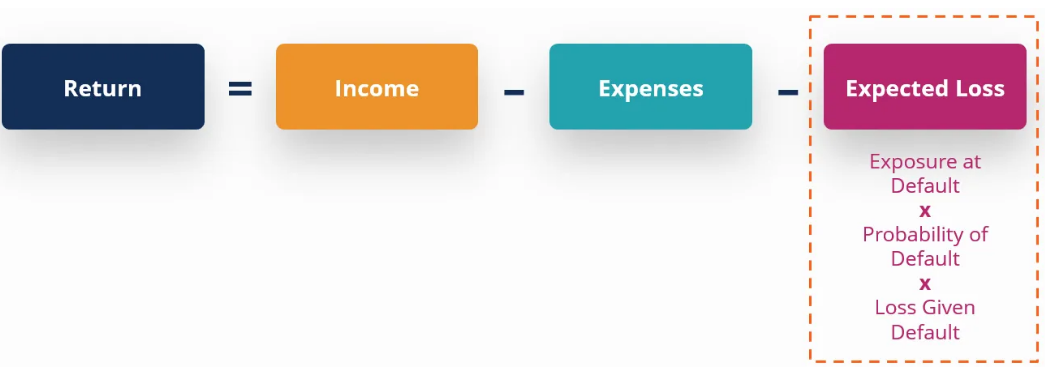

This model will provide the bank with a more accurate understanding of the potential losses from its loans, thus allowing it to make more informed decisions about credit risk management and provisioning. The bank will also be able to identify high-risk loans and take appropriate actions to mitigate the risks.



                                                    ***


In [1]:
# importing the main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing main datasets
main= pd.read_csv("main_loan_base.csv")
monthly= pd.read_csv("monthly_balance_base.csv")
repayment= pd.read_csv("repayment_base.csv")

In [3]:
# importing the test datasets
test_main = pd.read_csv("test_main_loan_base.csv")
test_monthly = pd.read_csv("test_monthly_balance_base.csv")
test_repayment = pd.read_csv("test_repayment_base.csv")

In [4]:
main.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20


In [5]:
main.sample(5)

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
9059,LN30973680,Yuvraj Samra,"H.No. 95\nDara Road, Jamnagar 012862",Consumer-Durable,2889,253.43,1,6,24,37,4,13.5,78.22,2018-06-24,2020-12-27
1135,LN20914665,Vaibhav Borra,"H.No. 58, Sridhar, Pali 748786",Two-Wheeler,66481,452.19,1,0,4,64,2,13.3,3170.00,2020-10-27,2022-01-11
14024,LN14990166,Zara Ramanathan,"H.No. 226\nGala Marg, Dehradun 364941",Personal,178456,35637.18,0,1,15,97,4,8.0,4356.63,2018-04-18,2021-04-29
7053,LN52725585,Tara Chowdhury,H.No. 469\nTank Chowk\nKolkata 861661,Two-Wheeler,191104,47870.44,0,0,11,57,3,8.7,6050.41,2021-03-08,2021-06-06
32542,LN71188475,Aarush Yohannan,69/980\nSingh\nGuna 520049,Personal,54195,8517.90,6,2,3,154,1,12.4,4825.31,2014-09-21,2015-02-17


In [6]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_acc_num       50000 non-null  object 
 1   customer_name      50000 non-null  object 
 2   customer_address   50000 non-null  object 
 3   loan_type          50000 non-null  object 
 4   loan_amount        50000 non-null  int64  
 5   collateral_value   50000 non-null  float64
 6   cheque_bounces     50000 non-null  int64  
 7   number_of_loans    50000 non-null  int64  
 8   missed_repayments  50000 non-null  int64  
 9   vintage_in_months  50000 non-null  int64  
 10  tenure_years       50000 non-null  int64  
 11  interest           50000 non-null  float64
 12  monthly_emi        50000 non-null  float64
 13  disbursal_date     50000 non-null  object 
 14  default_date       50000 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 5.7+ MB


In [7]:
main.shape

(50000, 15)

In [8]:
# Changing data types in main dataset
main['disbursal_date'] = pd.to_datetime(main['disbursal_date'], infer_datetime_format=True)
main['default_date'] = pd.to_datetime(main['default_date'], infer_datetime_format=True)

In [9]:
# Changing data types in test dataset
test_main['disbursal_date'] = pd.to_datetime(test_main['disbursal_date'], infer_datetime_format=True)
test_main['default_date'] = pd.to_datetime(test_main['default_date'], infer_datetime_format=True)

In [10]:
#Creating a new main data set with zero duplicates.
main = main[~main['loan_acc_num'].duplicated()]
print(main.shape)

(49985, 15)


In [11]:
#Creating a new test data set with zero duplicates.
test_main = test_main[~test_main['loan_acc_num'].duplicated()]
print(test_main.shape)

(9997, 15)


In [12]:
repayment.sample(5)

,loan_acc_num,repayment_amount,repayment_date
178446,LN69463861,66674.23,2013-03-30
474933,LN47228681,3308.69,2022-10-17
352019,LN30455552,3588.16,2014-09-17
524833,LN74737747,15326.85,2019-12-12
111329,LN98365263,39303.29,2022-07-04


In [13]:
repayment.head

<bound method NDFrame.head of        loan_acc_num  repayment_amount repayment_date
0        LN79307711       1012.320000     2019-05-18
1        LN79307711        667.987539     2019-06-20
2        LN79307711       1012.320000     2019-07-16
3        LN79307711       1012.320000     2019-08-16
4        LN79307711       1012.320000     2019-09-22
...             ...               ...            ...
626596   LN74765572       3771.910000     2014-10-22
626597   LN74765572       3771.910000     2014-11-15
626598   LN46546410      21443.470000     2014-06-12
626599   LN46546410      21443.470000     2014-07-18
626600   LN46546410      21443.470000     2014-08-18

[626601 rows x 3 columns]>

In [14]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626601 entries, 0 to 626600
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_acc_num      626601 non-null  object 
 1   repayment_amount  626601 non-null  float64
 2   repayment_date    626601 non-null  object 
dtypes: float64(1), object(2)
memory usage: 14.3+ MB


In [15]:
repayment['loan_acc_num'].nunique()

46008

In [16]:
#Groupby
repayment = round(repayment.groupby('loan_acc_num')['repayment_amount'].sum(),2)
repayment = pd.DataFrame({"loan_acc_num":repayment.index, "repayment_amount":repayment.values})
repayment.head()

,loan_acc_num,repayment_amount
0,LN10000701,40020.99
1,LN10001077,112218.47
2,LN10004116,290634.94
3,LN10007976,337321.72
4,LN10010204,61290.49


In [17]:
test_repayment = round(test_repayment.groupby('loan_acc_num')['repayment_amount'].sum(),2)
test_repayment = pd.DataFrame({"loan_acc_num":test_repayment.index, "repayment_amount":test_repayment.values})
test_repayment.head()

,loan_acc_num,repayment_amount
0,LN10011015,1725.31
1,LN10028091,3560.31
2,LN10033713,11582.17
3,LN10045654,66181.74
4,LN10051605,87664.41


In [18]:
# test.info()

In [19]:
# test.sample()

In [20]:
main.shape

(49985, 15)

In [21]:
repayment.shape

(46008, 2)

In [22]:
df = pd.merge(
    left=main,
    right=repayment,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [23]:
test_df = pd.merge(
    left=test_main,
    right=test_repayment,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [24]:
df.shape

(49985, 16)

In [25]:
#deriving the target
df['target'] = (df['loan_amount']-(df['collateral_value']+df['repayment_amount']))/df['loan_amount']

In [26]:
df.sample(5)

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,repayment_amount,target
25053,LN48038755,Nayantara Viswanathan,"H.No. 03\nBhandari Chowk, Dehri-884197",Car,569402,116842.00,2,2,13,15,2,8.3,25830.49,2019-09-04,2020-01-16,NaN,NaN
23524,LN81060910,Dishani Rajagopal,"341\nBumb Street, Agartala 234991",Two-Wheeler,41695,5956.41,2,1,8,56,3,11.8,1380.89,2015-08-10,2015-12-19,14802.08,0.502135
10677,LN88816689,Reyansh Hora,42/711\nSidhu Ganj\nImphal 807214,Consumer-Durable,15388,3875.10,0,0,7,85,3,8.8,487.90,2013-09-04,2015-01-29,5980.62,0.359519
13885,LN37772350,Yakshit Dubey,"H.No. 864\nVarkey Road, Kolhapur-297485",Consumer-Durable,11547,2781.04,3,3,15,16,3,10.9,377.49,2013-06-30,2013-12-18,754.98,0.693772
36554,LN95609317,Ela Yogi,"15, Hari Circle\nAmritsar 128677",Consumer-Durable,17739,2945.86,1,0,3,190,4,12.0,467.14,2018-05-31,2019-08-10,13849.10,0.053218


In [27]:
df.isnull().sum()

loan_acc_num            0
customer_name           0
customer_address        0
loan_type               0
loan_amount             0
collateral_value        0
cheque_bounces          0
number_of_loans         0
missed_repayments       0
vintage_in_months       0
tenure_years            0
interest                0
monthly_emi             0
disbursal_date          0
default_date            0
repayment_amount     3977
target               3977
dtype: int64

In [28]:
test_df.isnull().sum()

loan_acc_num           0
customer_name          0
customer_address       0
loan_type              0
loan_amount            0
collateral_value       0
cheque_bounces         0
number_of_loans        0
missed_repayments      0
vintage_in_months      0
tenure_years           0
interest               0
monthly_emi            0
disbursal_date         0
default_date           0
repayment_amount     768
dtype: int64

In [29]:
#null value imputation
df['repayment_amount'] = df['repayment_amount'].fillna(0)

In [30]:
#null value imputation
test_df['repayment_amount'] = test_df['repayment_amount'].fillna(0)

In [31]:
#null value imputation
df['target'] = df['target'].fillna(df['target'].mean())

In [32]:
#creating new variable: feature engineering
df['due'] = df['loan_amount'] - df['repayment_amount']

In [33]:
#creating new variable: feature engineering
test_df['due'] = test_df['loan_amount'] - test_df['repayment_amount']

In [34]:
monthly.sample(5)

,loan_acc_num,date,balance_amount
2239036,LN91011798,2020-02-09,33887.964126
506113,LN85876058,2023-08-12,11158.709939
3648348,LN45963399,2013-02-05,9321.872266
3257887,LN55719533,2018-04-24,18382.111460
3066915,LN82592291,2017-05-23,1712.693671


In [35]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4002490 entries, 0 to 4002489
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   loan_acc_num    object 
 1   date            object 
 2   balance_amount  float64
dtypes: float64(1), object(2)
memory usage: 91.6+ MB


In [36]:
monthly['loan_acc_num'].nunique()

49671

In [37]:
monthly = round(monthly.groupby('loan_acc_num')['balance_amount'].mean(),2)
monthly = pd.DataFrame({"loan_acc_num":monthly.index, "average_monthly_balance":monthly.values})
monthly.head()

,loan_acc_num,average_monthly_balance
0,LN10000701,2301.88
1,LN10001077,2296.28
2,LN10004116,8887.38
3,LN10007976,9420.56
4,LN10010204,6446.21


In [38]:
test_monthly = round(test_monthly.groupby('loan_acc_num')['balance_amount'].mean(),2)
test_monthly = pd.DataFrame({"loan_acc_num":test_monthly.index, "average_monthly_balance":test_monthly.values})
test_monthly.head()

,loan_acc_num,average_monthly_balance
0,LN10011015,25.09
1,LN10028091,62.53
2,LN10033713,182.41
3,LN10045654,1838.35
4,LN10051605,3374.17


In [39]:
#Merging main datasets
data = pd.merge(
    left=df,
    right=monthly,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [40]:
#Merging test datasets
test_data = pd.merge(
    left=test_df,
    right=test_monthly,
    left_on='loan_acc_num',
    right_on='loan_acc_num',
    how='left'
)

In [41]:
data.shape

(49985, 19)

In [42]:
test_data.shape

(9997, 18)

In [43]:
data.isnull().sum()

loan_acc_num                 0
customer_name                0
customer_address             0
loan_type                    0
loan_amount                  0
collateral_value             0
cheque_bounces               0
number_of_loans              0
missed_repayments            0
vintage_in_months            0
tenure_years                 0
interest                     0
monthly_emi                  0
disbursal_date               0
default_date                 0
repayment_amount             0
target                       0
due                          0
average_monthly_balance    314
dtype: int64

In [44]:
#null value imputation
data['average_monthly_balance'] = data['average_monthly_balance'].fillna(data['average_monthly_balance'].mean())

In [45]:
#null value imputation
test_data['average_monthly_balance'] = test_data['average_monthly_balance'].fillna(test_data['average_monthly_balance'].mean())

In [46]:
data.isnull().sum()

loan_acc_num               0
customer_name              0
customer_address           0
loan_type                  0
loan_amount                0
collateral_value           0
cheque_bounces             0
number_of_loans            0
missed_repayments          0
vintage_in_months          0
tenure_years               0
interest                   0
monthly_emi                0
disbursal_date             0
default_date               0
repayment_amount           0
target                     0
due                        0
average_monthly_balance    0
dtype: int64

In [47]:
test_data.isnull().sum()

loan_acc_num               0
customer_name              0
customer_address           0
loan_type                  0
loan_amount                0
collateral_value           0
cheque_bounces             0
number_of_loans            0
missed_repayments          0
vintage_in_months          0
tenure_years               0
interest                   0
monthly_emi                0
disbursal_date             0
default_date               0
repayment_amount           0
due                        0
average_monthly_balance    0
dtype: int64

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49985 entries, 0 to 49984
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_acc_num             49985 non-null  object        
 1   customer_name            49985 non-null  object        
 2   customer_address         49985 non-null  object        
 3   loan_type                49985 non-null  object        
 4   loan_amount              49985 non-null  int64         
 5   collateral_value         49985 non-null  float64       
 6   cheque_bounces           49985 non-null  int64         
 7   number_of_loans          49985 non-null  int64         
 8   missed_repayments        49985 non-null  int64         
 9   vintage_in_months        49985 non-null  int64         
 10  tenure_years             49985 non-null  int64         
 11  interest                 49985 non-null  float64       
 12  monthly_emi              49985 n

In [49]:
data.describe()

,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,repayment_amount,target,due,average_monthly_balance
count,4.998500e+04,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,4.998500e+04,49985.000000,4.998500e+04,49985.000000
mean,3.817142e+05,57195.113444,1.764769,1.509573,9.807482,80.016705,2.994578,11.484611,16593.115676,1.514337e+05,0.423265,2.302806e+05,7679.277191
std,5.037769e+05,93412.679667,1.760305,1.259326,7.787036,44.141987,1.415455,2.019790,26696.292090,2.554824e+05,0.225701,3.437854e+05,16071.151167
min,2.000000e+03,0.070000,0.000000,0.000000,0.000000,15.000000,1.000000,8.000000,42.520000,0.000000e+00,-5.708000,-8.573322e+04,0.100000
25%,2.393400e+04,3329.430000,0.000000,0.000000,4.000000,44.000000,2.000000,9.700000,1158.280000,6.761950e+03,0.242430,1.580488e+04,417.980000
50%,1.926920e+05,19866.280000,1.000000,1.000000,8.000000,78.000000,3.000000,11.500000,6541.020000,4.849626e+04,0.423265,9.599627e+04,2186.470000
75%,4.334780e+05,62323.370000,3.000000,2.000000,15.000000,113.000000,4.000000,13.200000,19438.430000,1.668996e+05,0.600358,2.602902e+05,7557.930000
max,1.999992e+06,592545.710000,11.000000,6.000000,38.000000,258.000000,5.000000,15.000000,179521.680000,1.852111e+06,0.898372,1.997948e+06,261799.900000


In [50]:
#dropping the records with negative LGD
data = data.drop(data[data['target']<0].index)

In [51]:
test = test_data.copy()

### EDA

In [52]:
#separating numeric and categorical features
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

In [53]:
#top 10 correlated features
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(numeric_data, 10))

Top Absolute Correlations
loan_amount        due                        0.886538
                   monthly_emi                0.819133
                   collateral_value           0.809763
collateral_value   due                        0.803826
monthly_emi        average_monthly_balance    0.798077
loan_amount        repayment_amount           0.780483
monthly_emi        due                        0.718615
repayment_amount   average_monthly_balance    0.714145
vintage_in_months  target                     0.705141
collateral_value   monthly_emi                0.668101
dtype: float64


In [54]:
from statistics import mean
print("Average Monthly EMI: ",round(mean(data['monthly_emi']),2))
print("Average Repayment Amount: ",round(mean(data['repayment_amount']),2))
print("Average Loan Amount: ",round(mean(data['loan_amount']),2))

Average Monthly EMI:  16553.64
Average Repayment Amount:  150993.26
Average Loan Amount:  381630.43


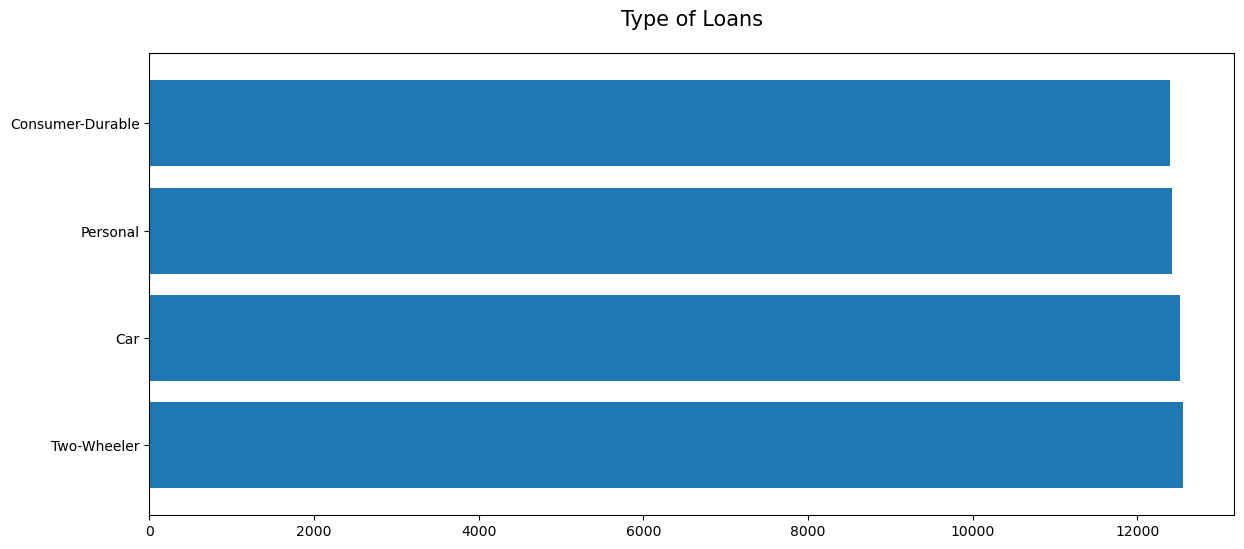

In [55]:
#Univariate Analysis
plt.figure(figsize = [14,6])
data["loan_type"].value_counts().plot.barh(width = .8)
plt.title("Type of Loans", fontdict={"fontsize":15}, pad =20)
plt.show()

Two Wheeler Loans appear to be Highest

In [56]:
def Uni_Analysis_Numarical(dataframe, column):
    sns.set(style='darkgrid')
    plt.figure(figsize=(25, 5))
    
    plt.subplot(1, 3, 1)
    sns.boxplot(data=dataframe, x=column, orient='v').set(title='Box Plot')
    
    plt.subplot(1, 3, 2)
    sns.distplot(dataframe[column].dropna()).set(title='Distplot')
    plt.show()

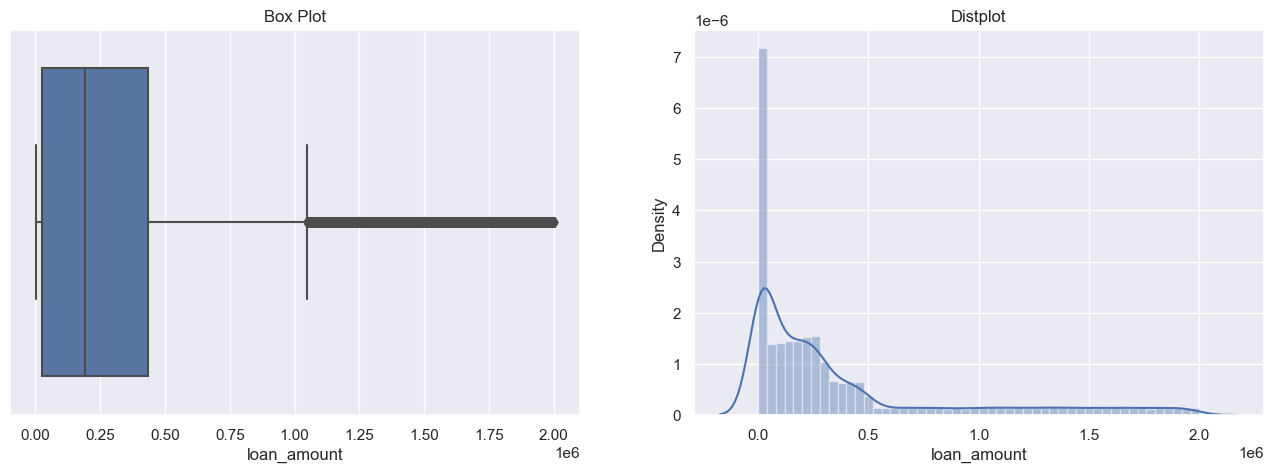

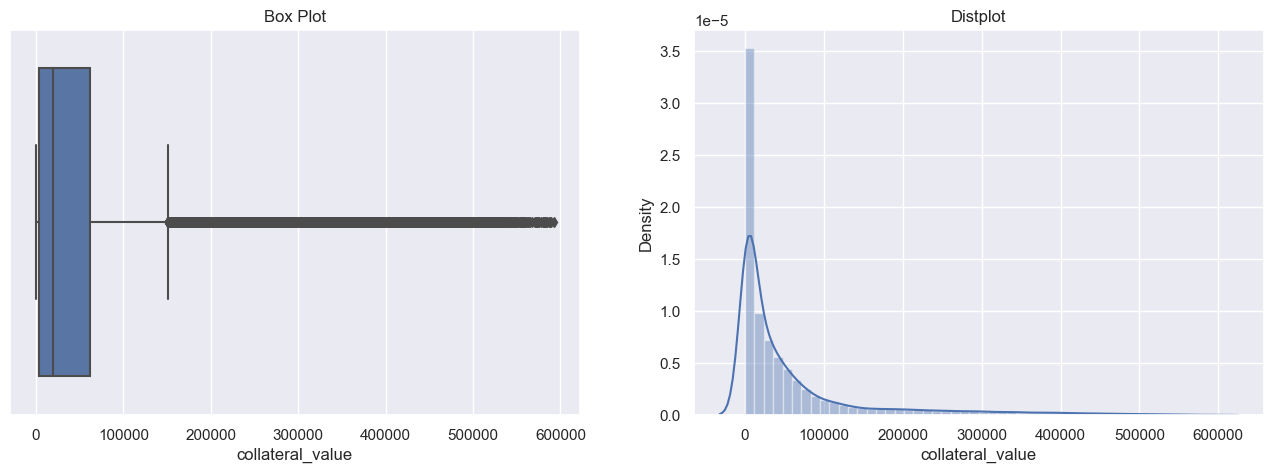

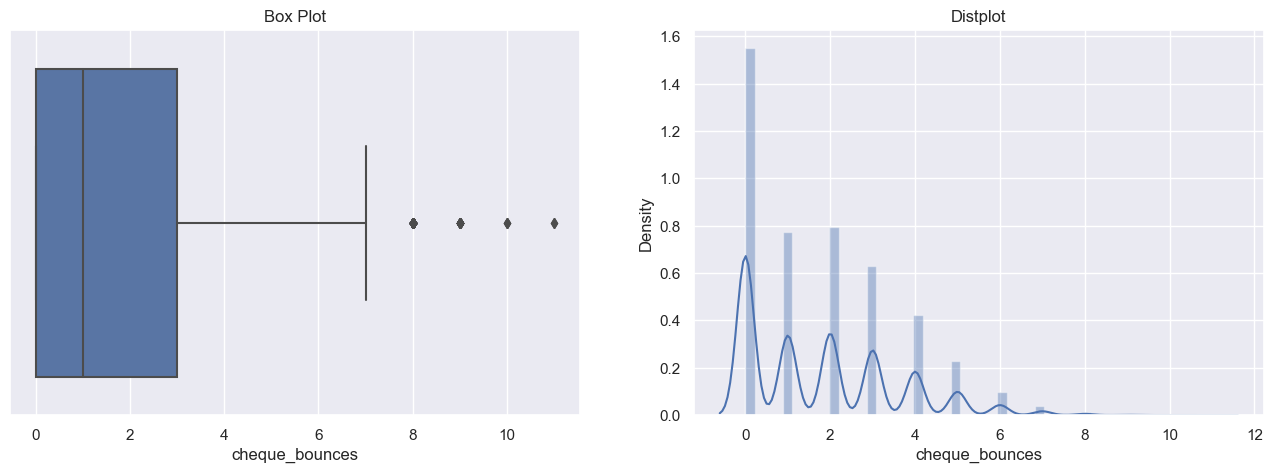

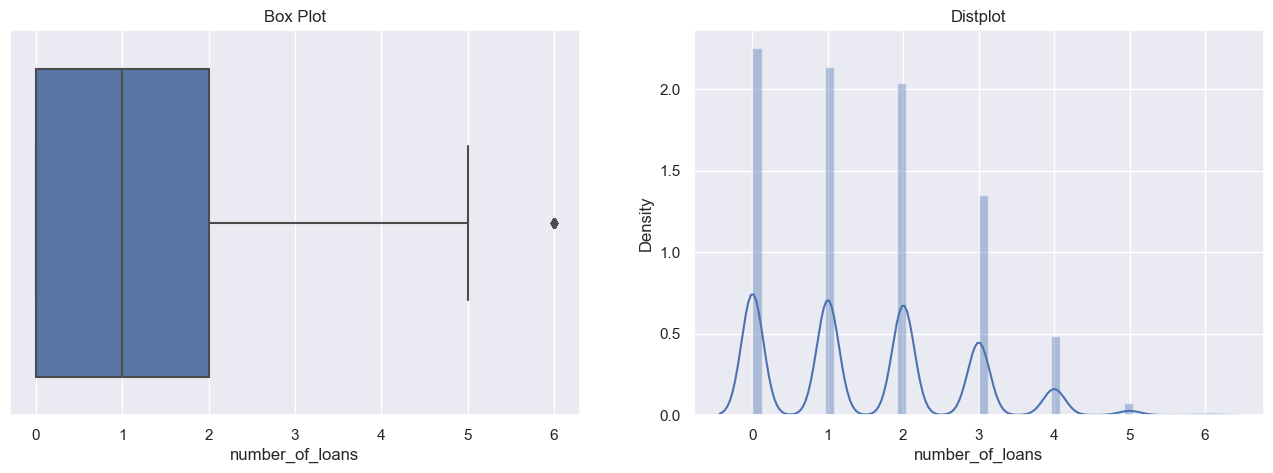

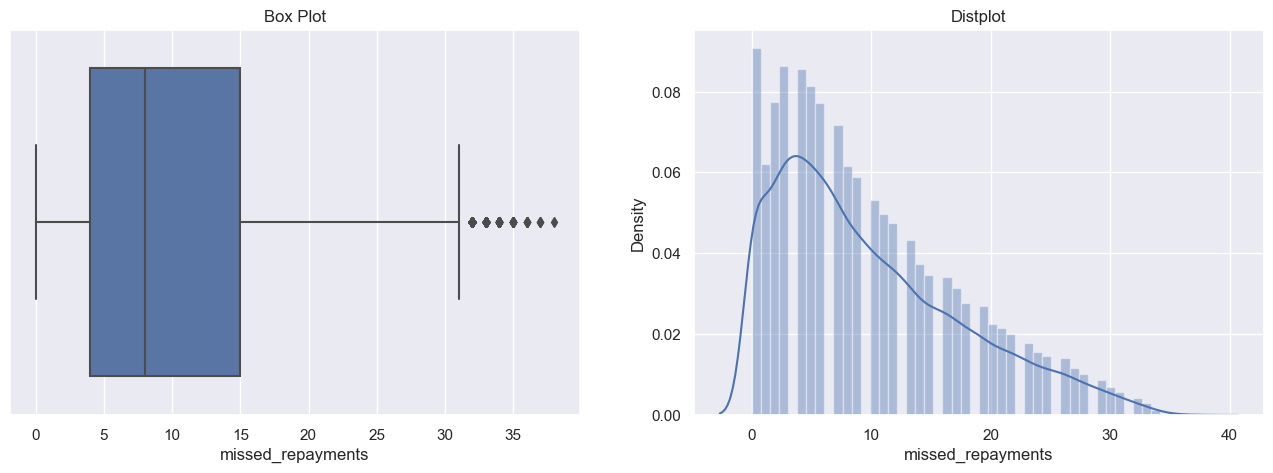

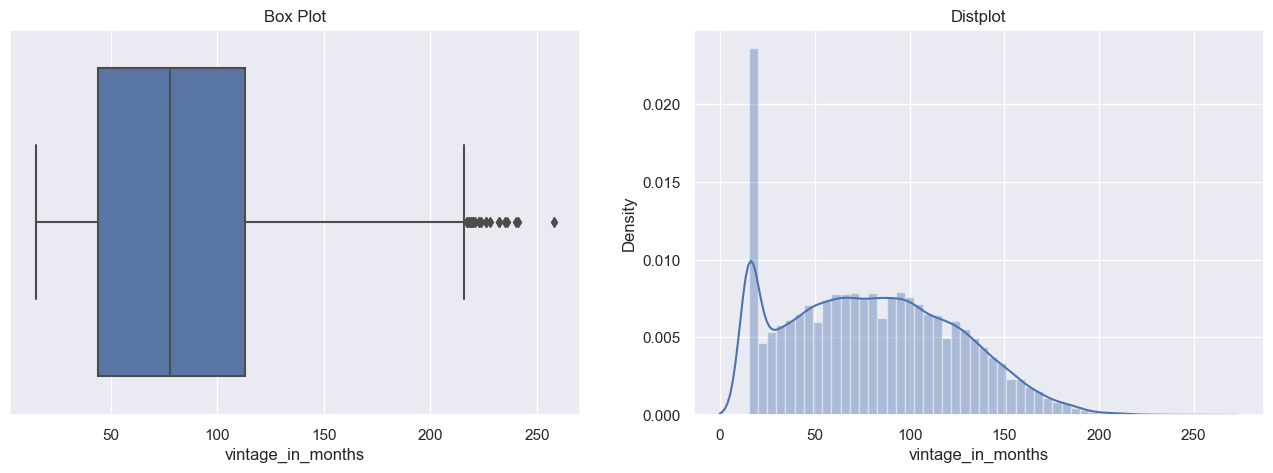

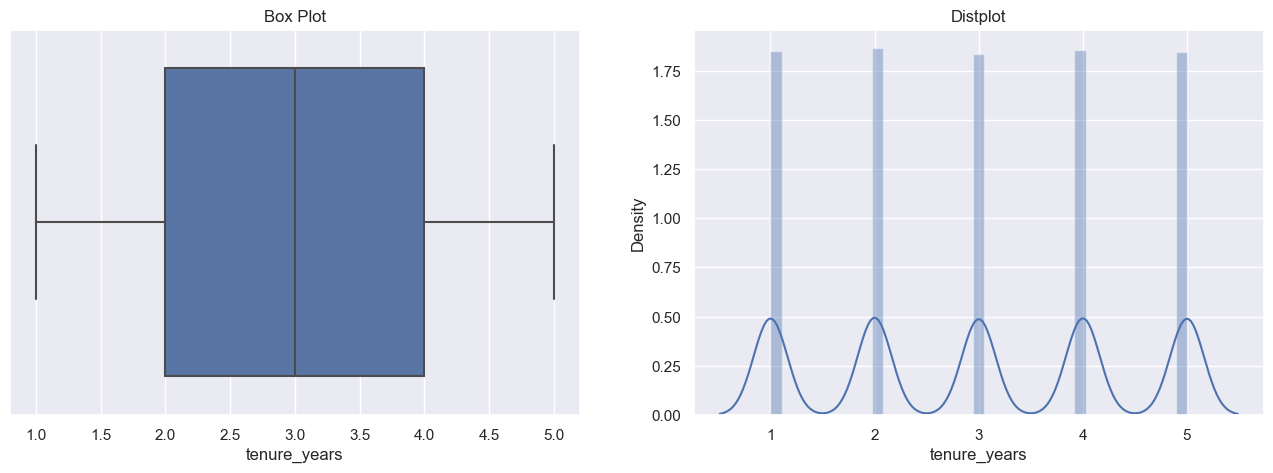

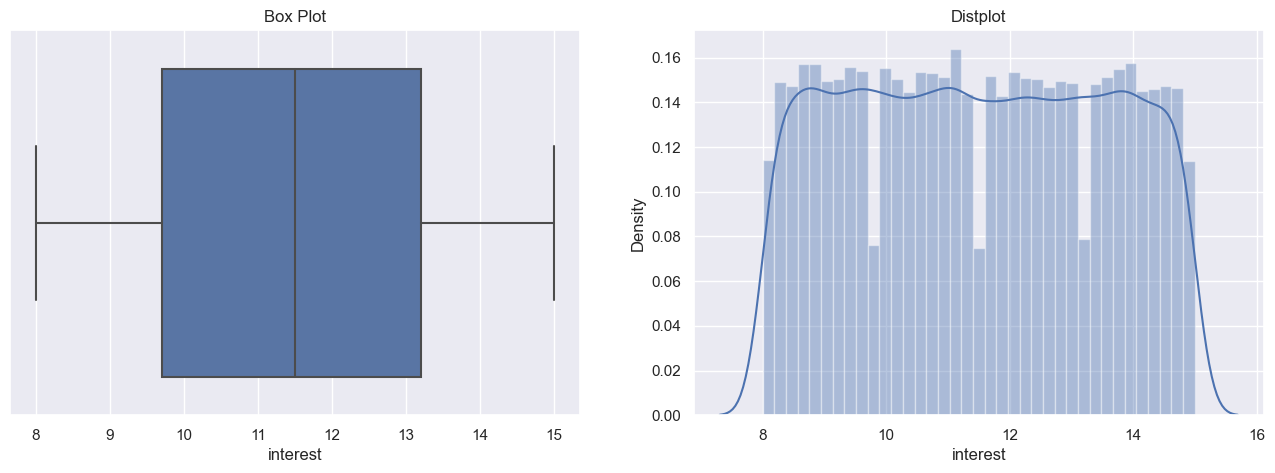

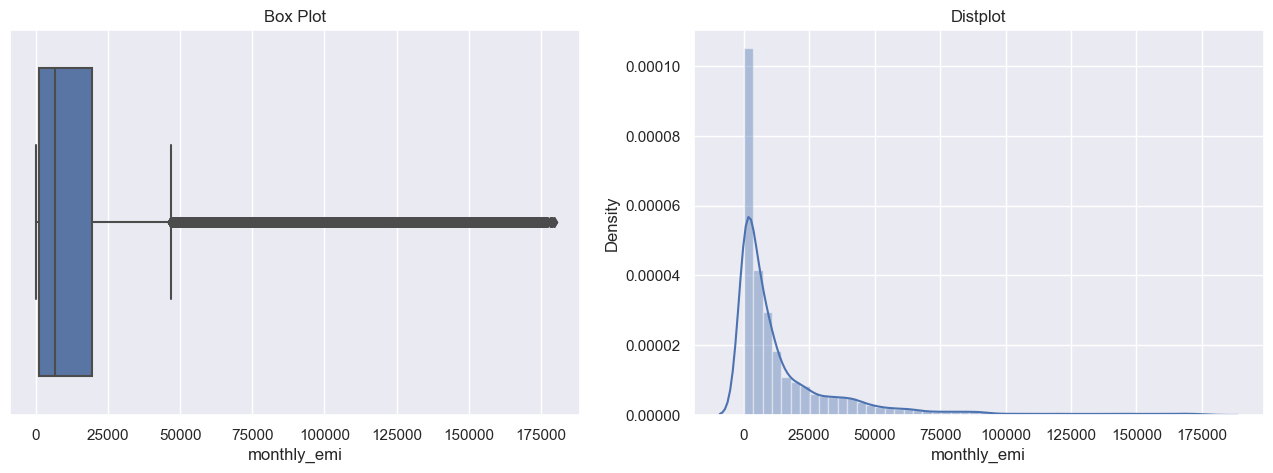

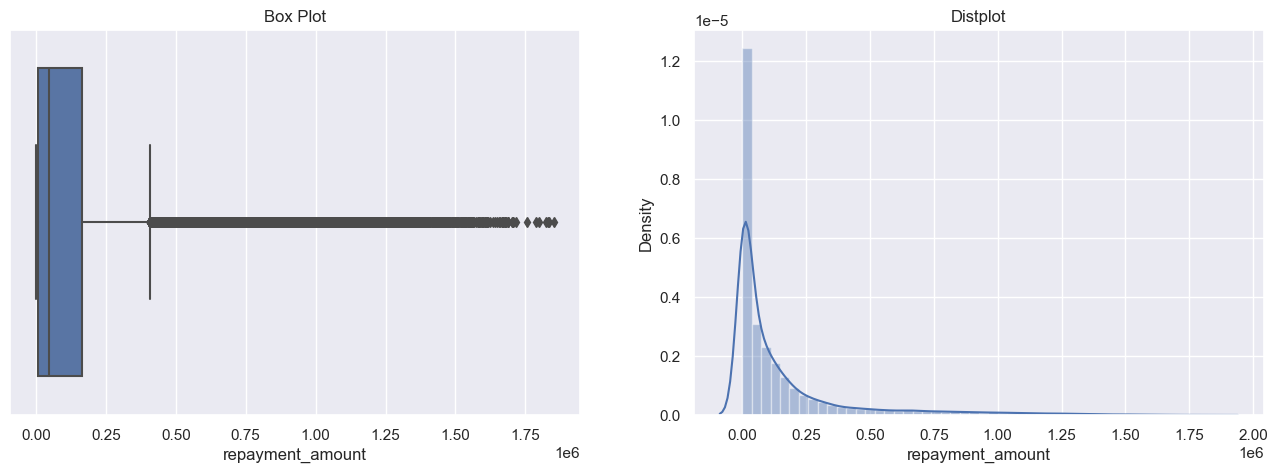

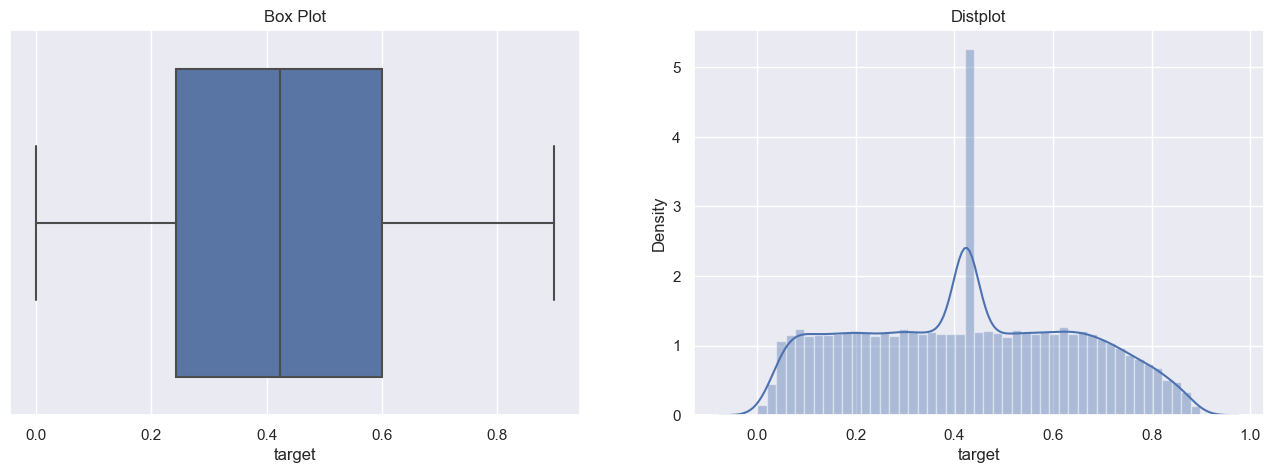

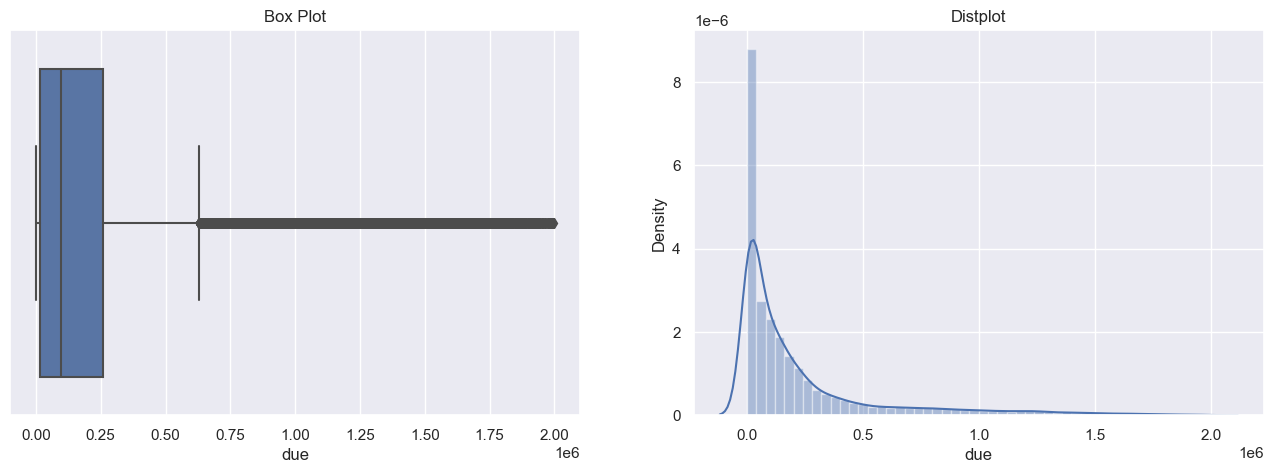

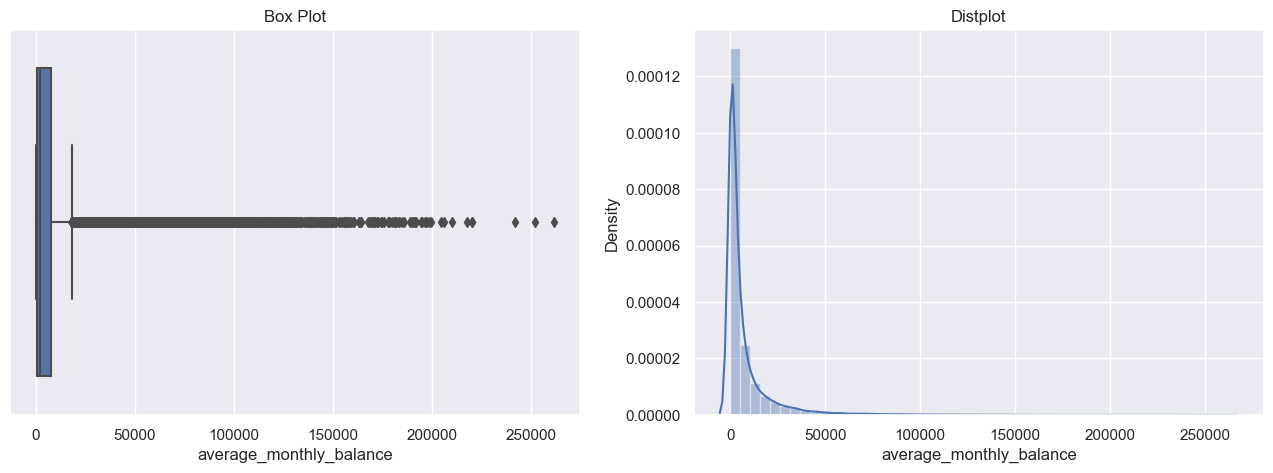

In [57]:
#Distribution of the numerical features
for i in numeric_data:
    Uni_Analysis_Numarical(data,i)

Observation:
Number to Two wheeler loans are maximum
Amount of loan disbursed for Car Loans are maximum

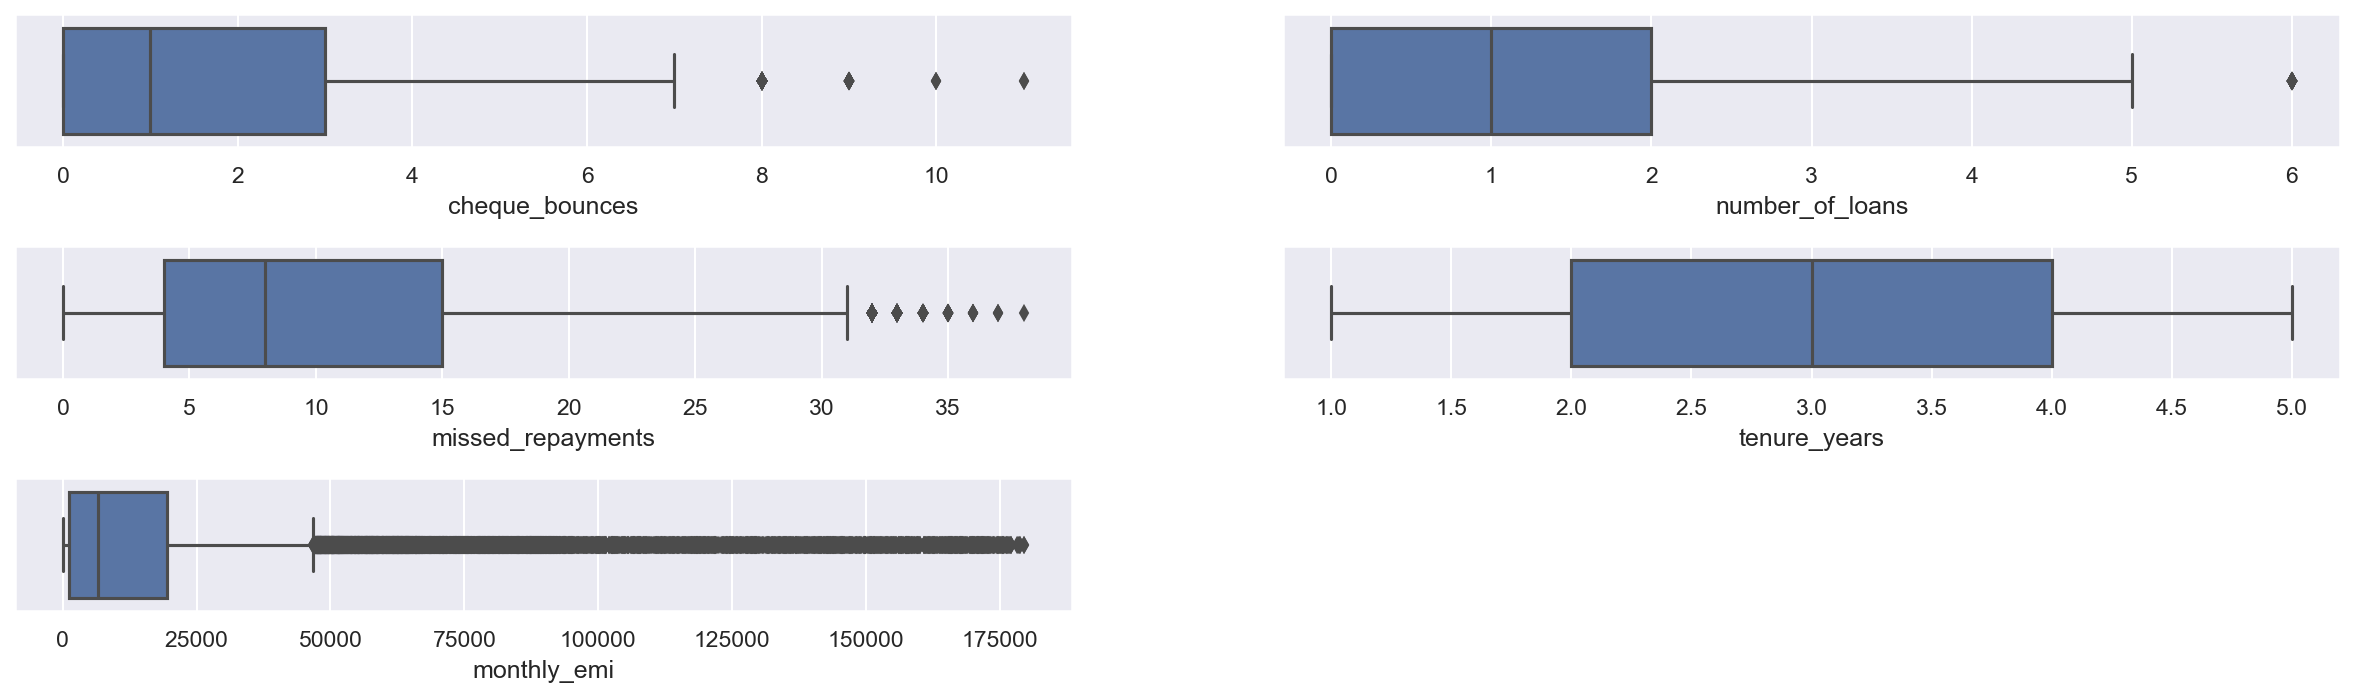

In [58]:
# Creating Univariate boxplots
df1= ['cheque_bounces','number_of_loans','missed_repayments','tenure_years','monthly_emi']
plt.figure(figsize = (20,200), dpi=150) 
for i in enumerate(df1):  
    plt.subplot(100, 2, i[0]+1) 
    plt.subplots_adjust(hspace=0.75)
    sns.boxplot(x = i[1], data = data)

Observation:
1. Monthly EMIs have enormous outliers. Though it will not effect our analysis
2. There are few loan accounts who have missed the repayments more than 30 times
3. Generally people are taking one loan at a time
4. Generally the loan tenure is 2-4 years
5. There are few loan account whose cheque has bounced more than 8 times

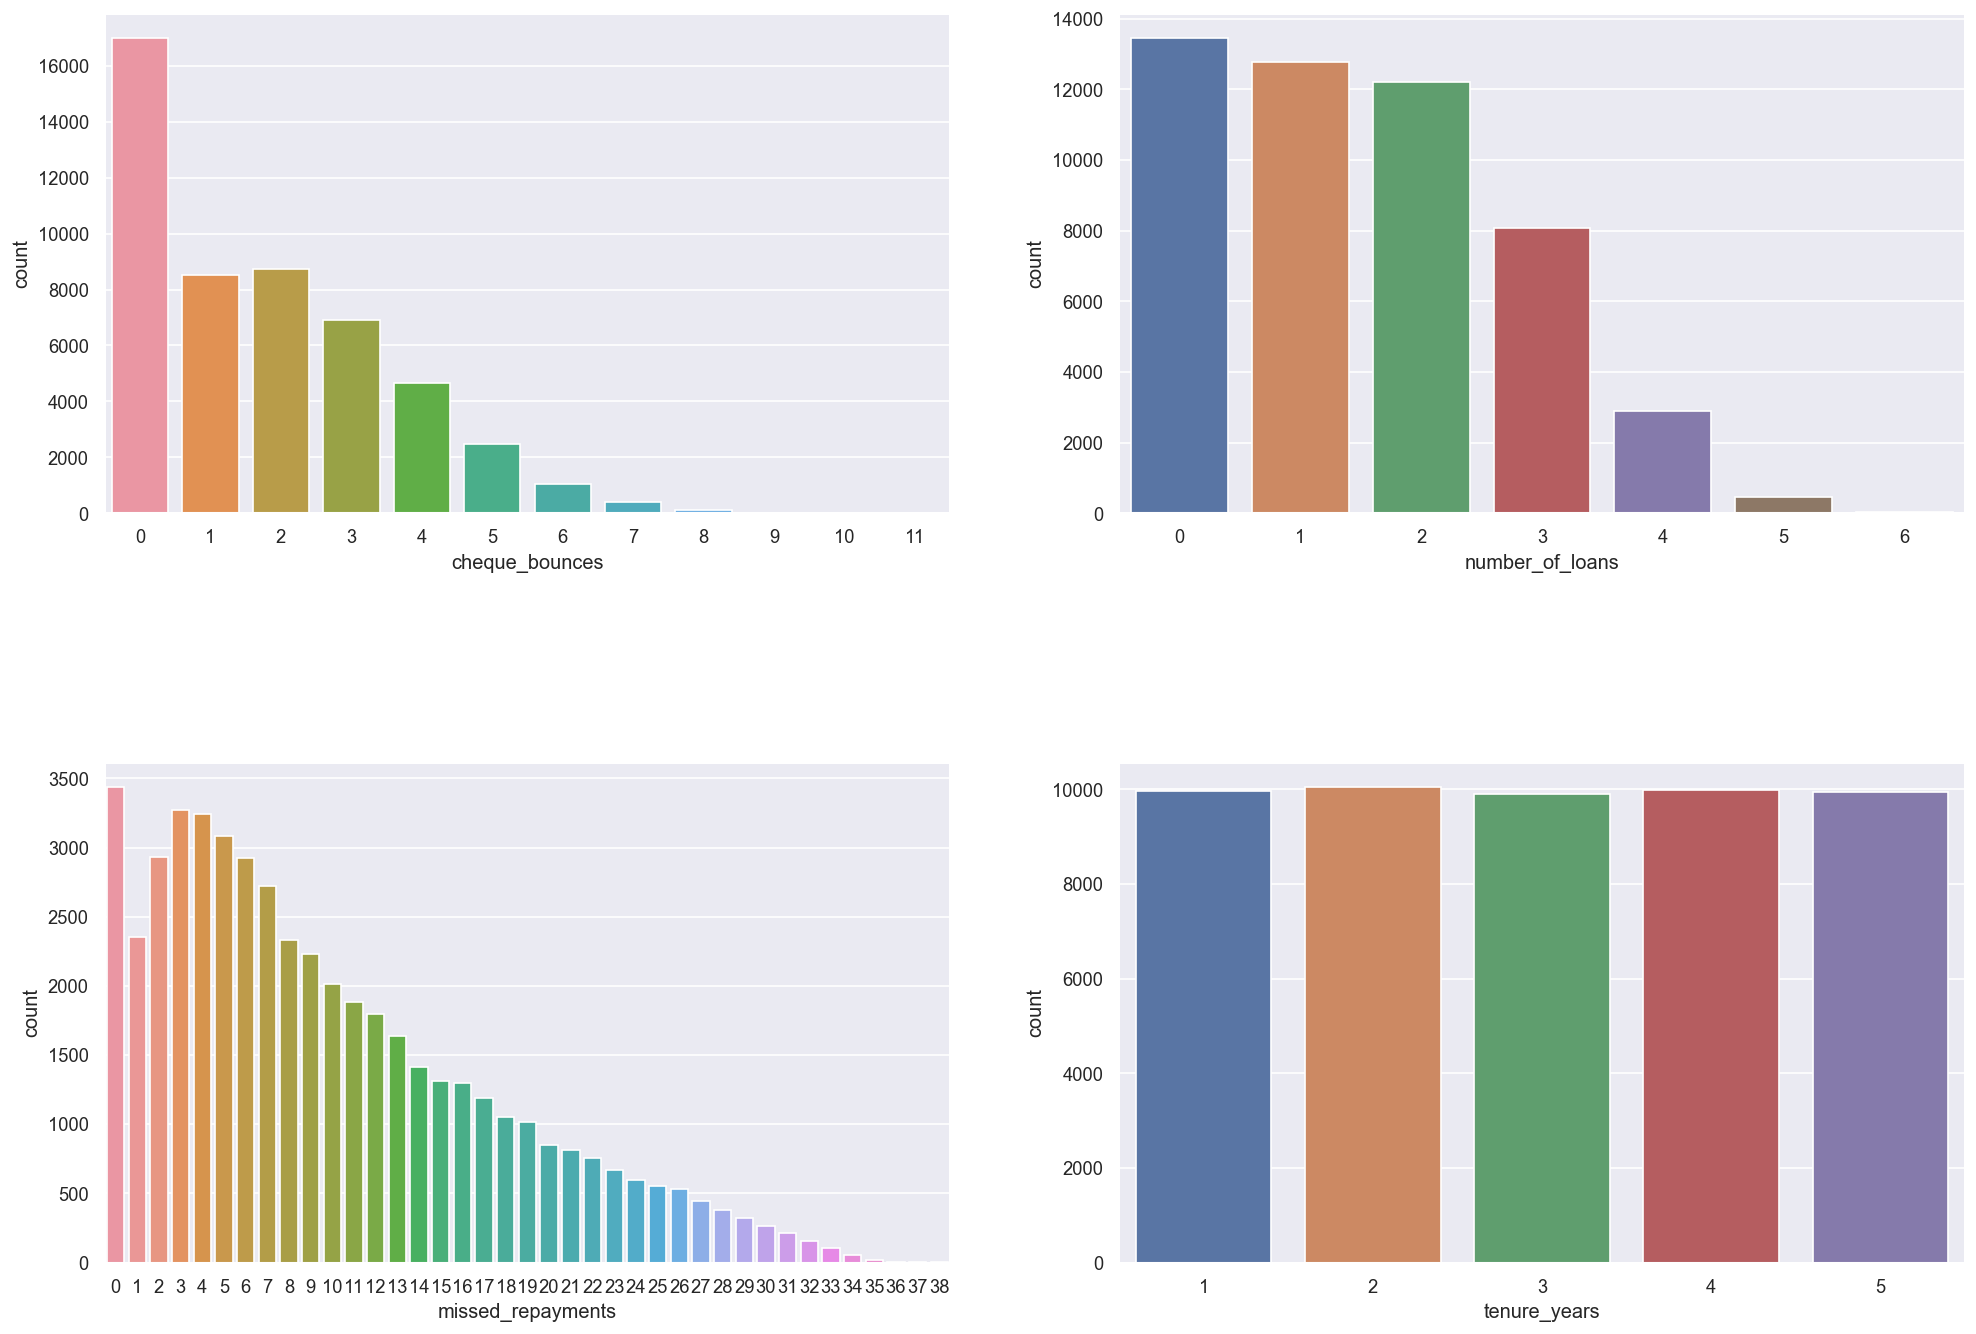

In [59]:
# Creating Univariate countplots
df2= ['cheque_bounces','number_of_loans','missed_repayments','tenure_years']
plt.figure(figsize = (20,200), dpi=120) 
for i in enumerate(df2):  
    plt.subplot(25, 2, i[0]+1) 
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], data = data)

Observation:
1. The cheques of over 16,000 loan accounts have bounced.
2. There is decreasing trend found on missed repayment of loan amount
3. Equal number of people are taking one and two loan at a time

### Bivariate Analysis

Text(0.5, 1.0, 'Type of loans')

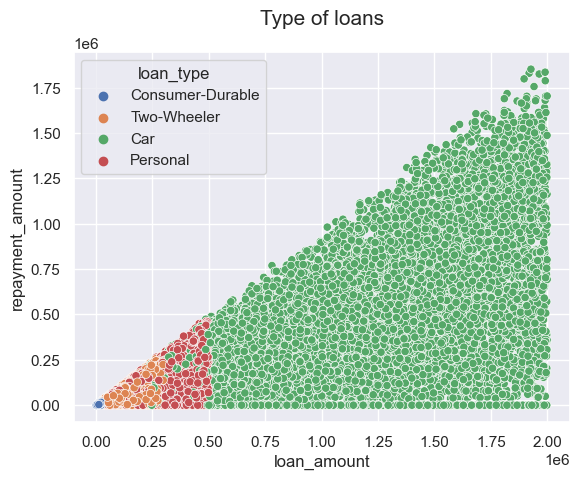

In [60]:
sns.scatterplot(x=data.loan_amount,
               y= data.repayment_amount,
               data=data, hue='loan_type')
plt.title('Type of loans', fontdict={'fontsize' : 15}, pad=20)

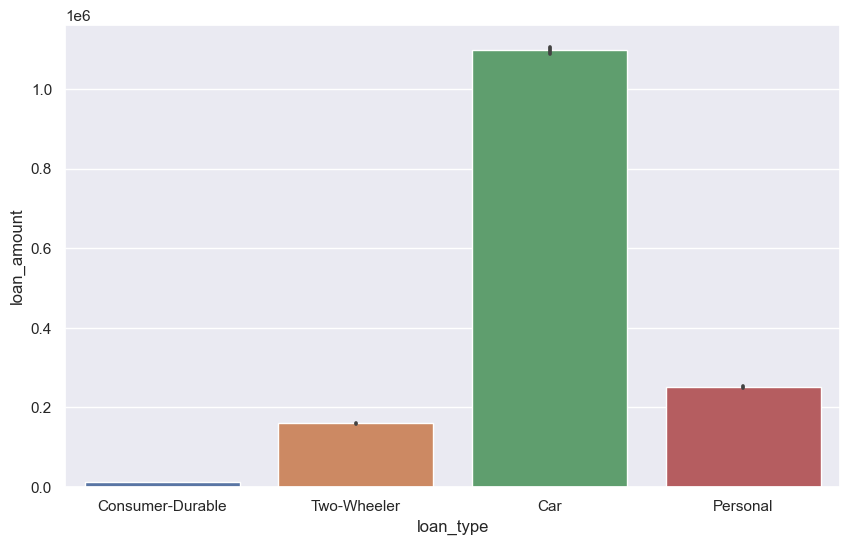

In [61]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.loan_amount)
plt.show()

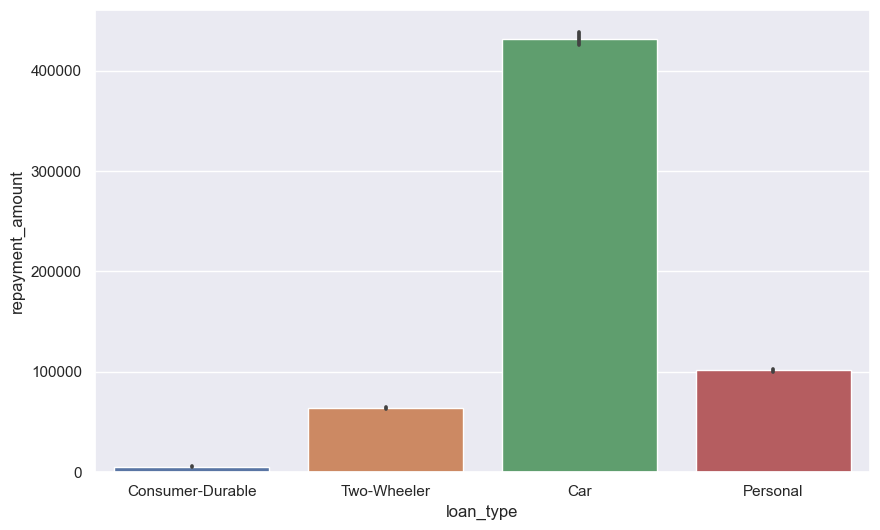

In [62]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.repayment_amount)
plt.show()

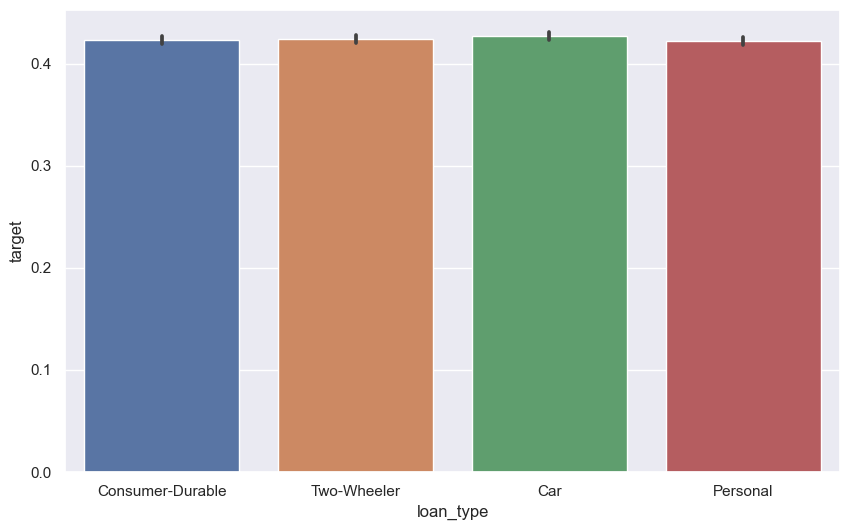

In [63]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.target)
plt.show()

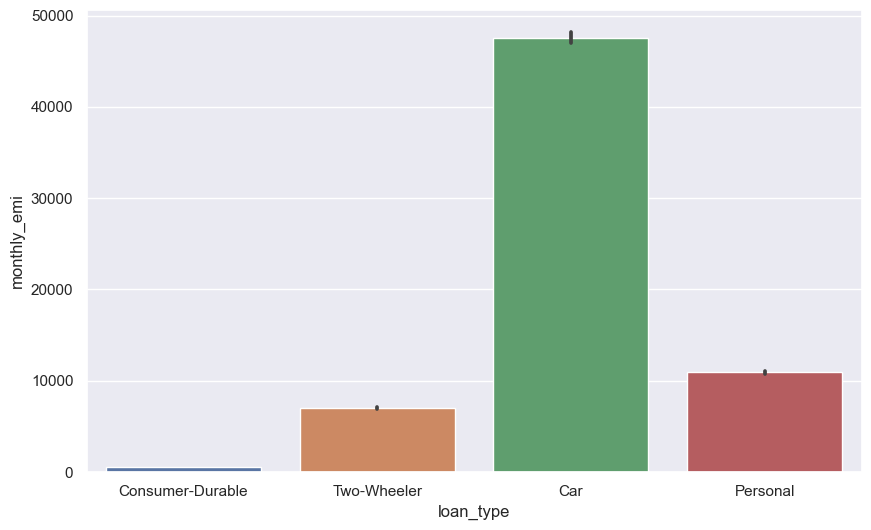

In [64]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.monthly_emi)
plt.show()

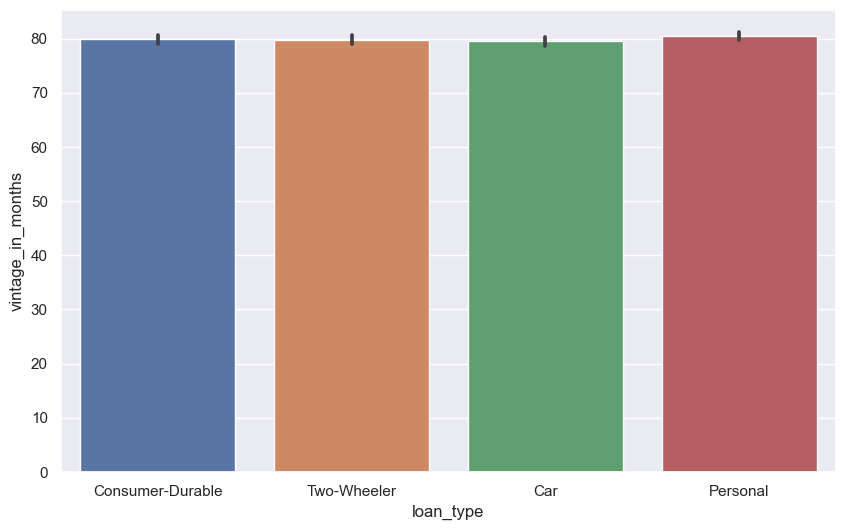

In [65]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.vintage_in_months)
plt.show()

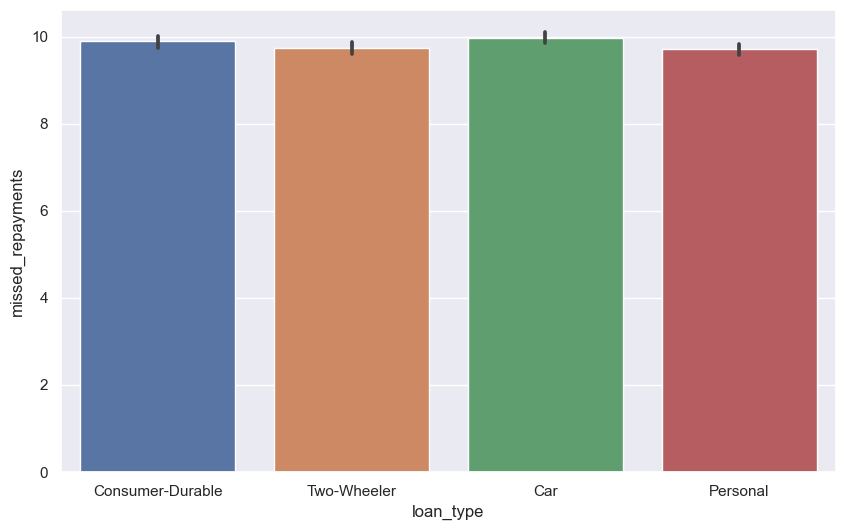

In [66]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.missed_repayments)
plt.show()

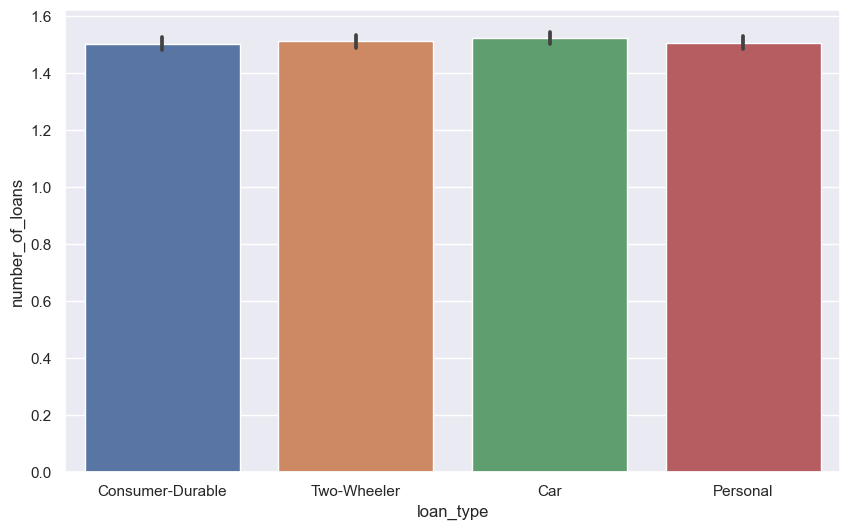

In [67]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.number_of_loans)
plt.show()

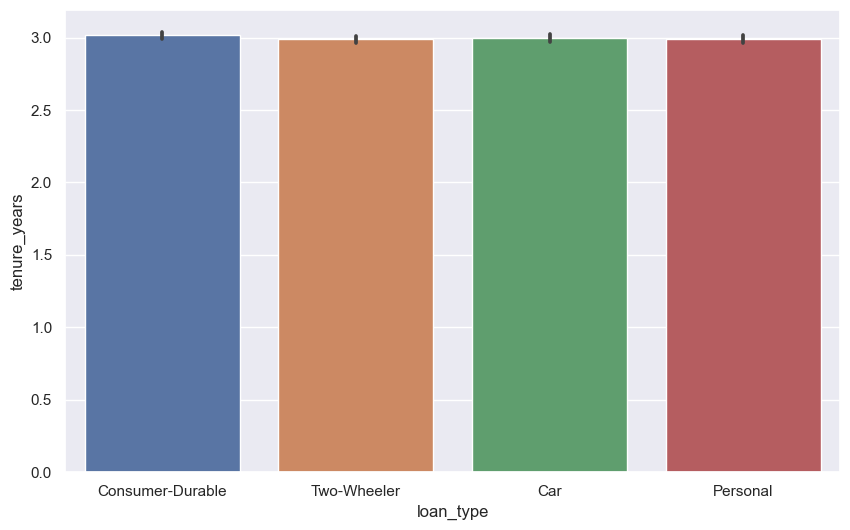

In [68]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.tenure_years)
plt.show()

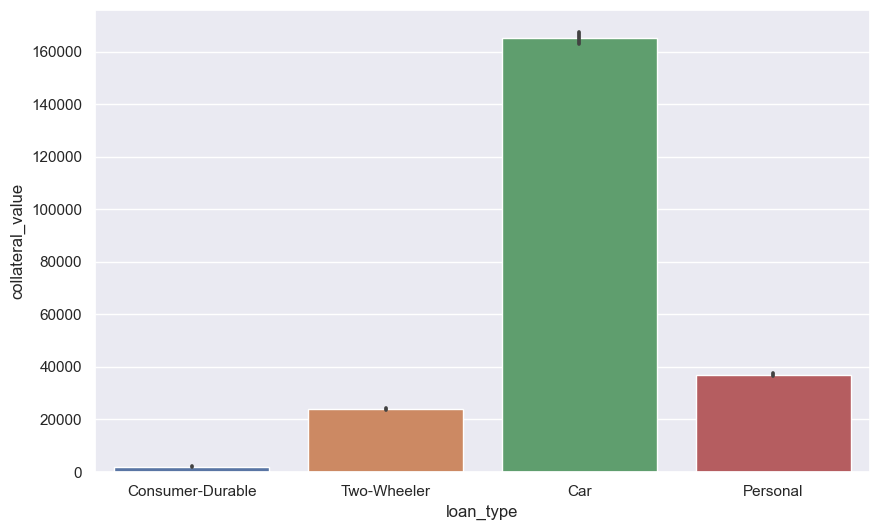

In [69]:
plt.figure(figsize = [10,6])
sns.set(style='darkgrid')
sns.barplot(x = data.loan_type,y = data.collateral_value)
plt.show()

Observation:
Repayment amount & EMI for Car Loans are higher than other loan types

### Data Preparation: variable transformation, feature engineering

In [70]:
#separating numeric and categorical features
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

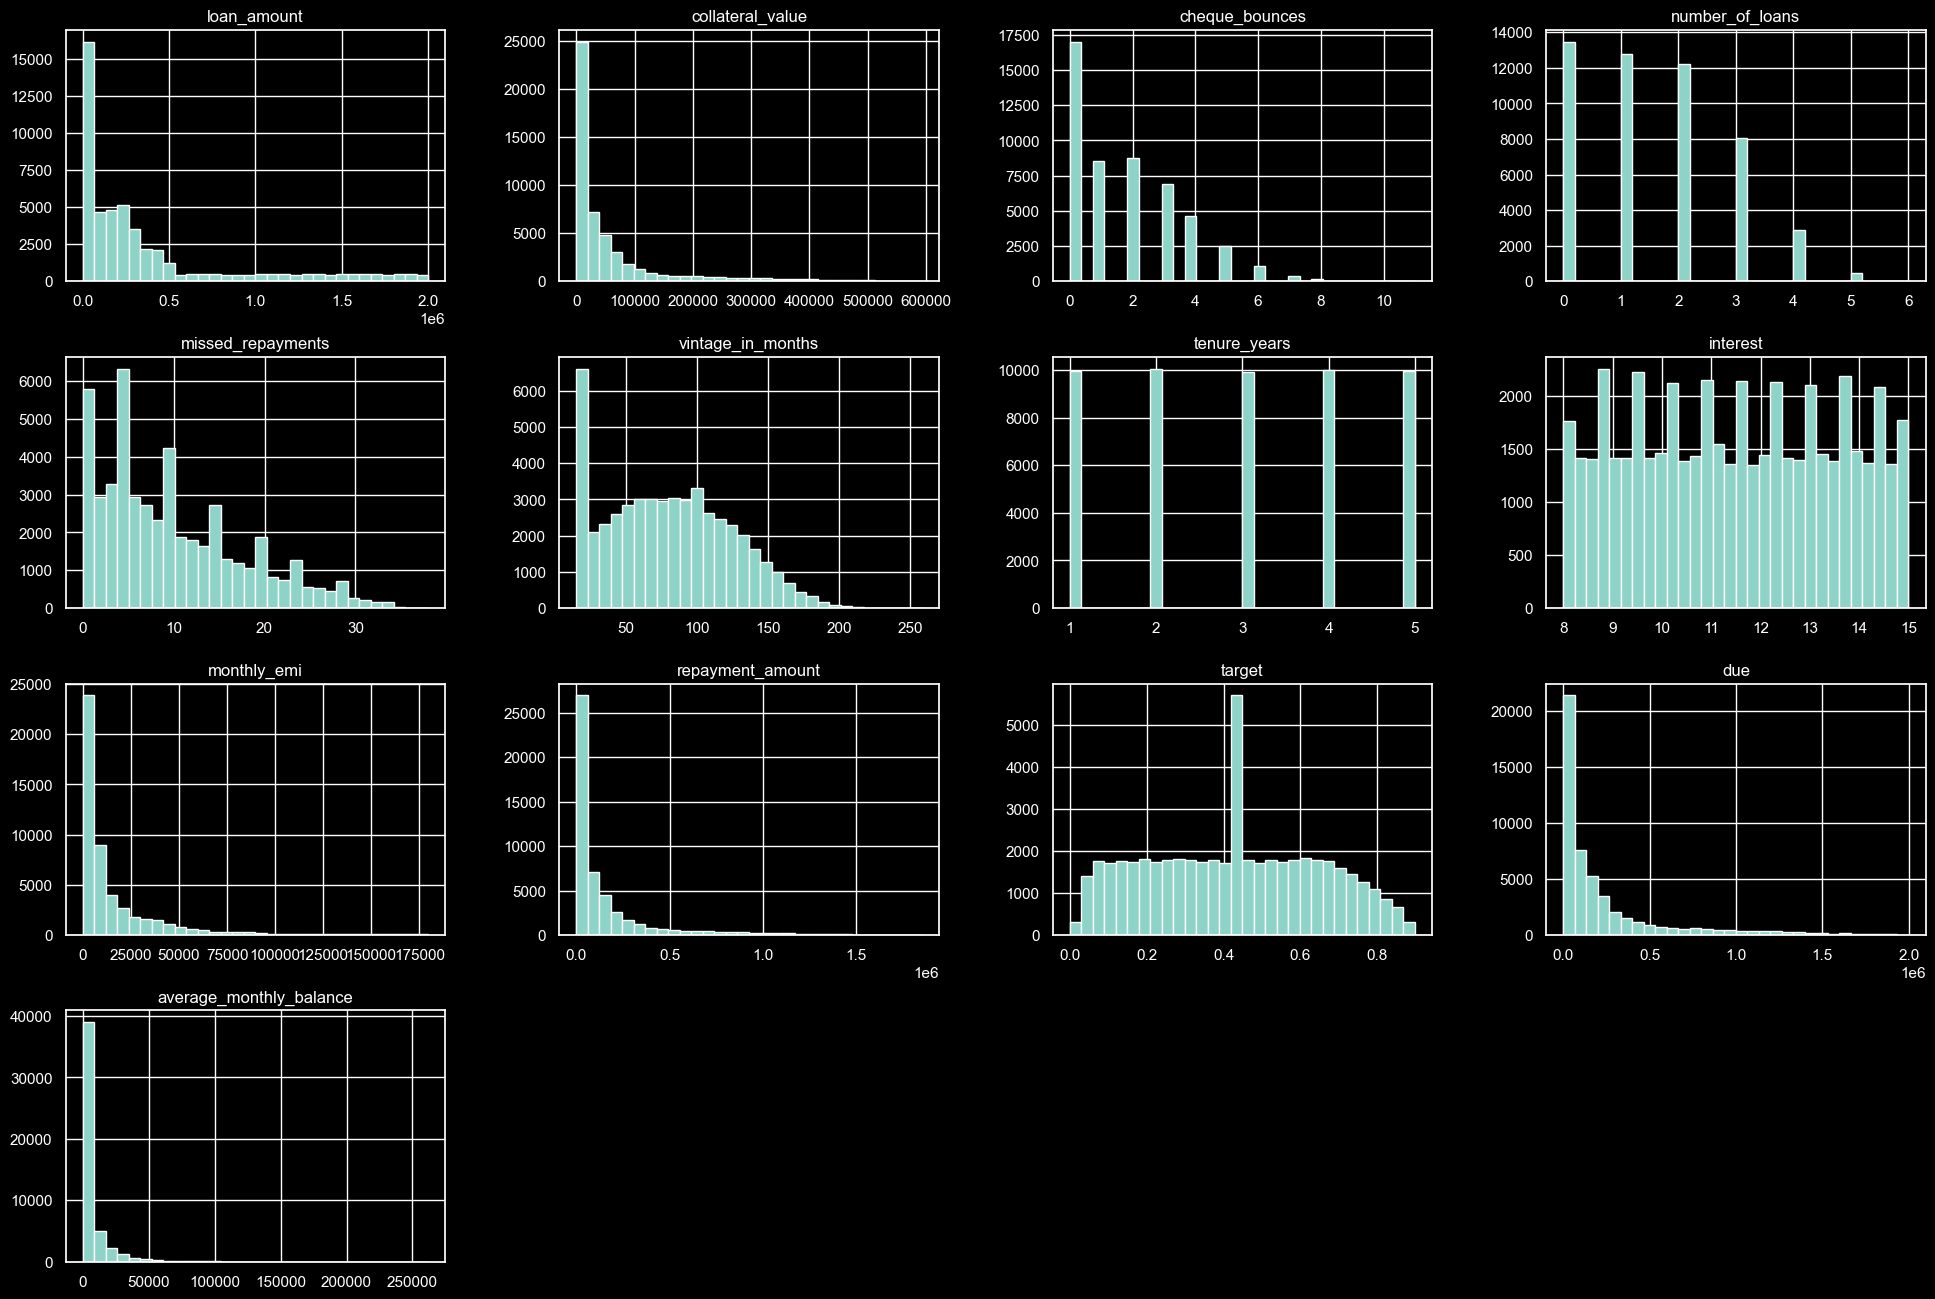

In [71]:
#plt.figure(figsize = (24,24))
plt.style.use('dark_background')
data[numeric_data.columns].hist(bins=30, figsize = (24,16))
plt.show()

In [72]:
numeric_data.columns

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'target', 'due',
       'average_monthly_balance'],
      dtype='object')

<AxesSubplot:>

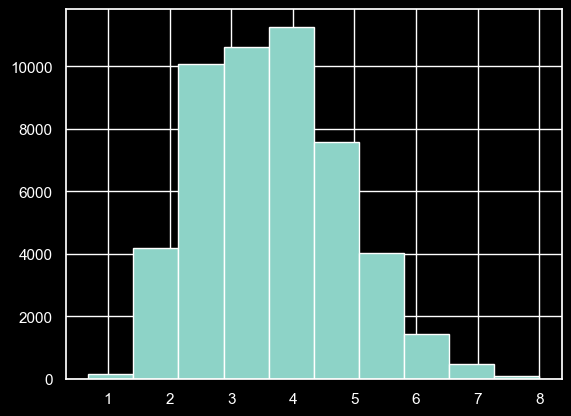

In [73]:
(data['average_monthly_balance']**(1/6)).hist()

<AxesSubplot:>

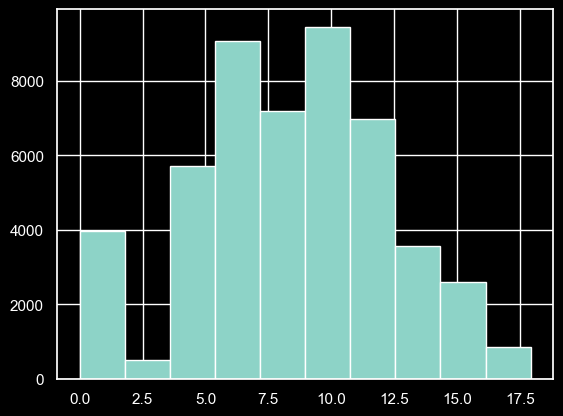

In [74]:
(data['repayment_amount']**(1/5)).hist()
#fig = plt.figure()
#(data['cheque_bounces']).hist()

##### Power Transformation was used here with respect to the linear regression assumption that all the independent features should have normal distribution

In [75]:
data['loan_amount'] = data['loan_amount']**(1/5)
data['collateral_value'] = data['collateral_value']**(1/5)
data['cheque_bounces'] = data['cheque_bounces']**(1/2)
data['missed_repayments'] = data['missed_repayments']**(1/2)
data['vintage_in_months'] = data['vintage_in_months']**(1/2)
data['monthly_emi'] = data['monthly_emi']**(1/6)
data['repayment_amount'] = data['repayment_amount']**(1/5)
data['average_monthly_balance'] = data['average_monthly_balance']**(1/6)

In [76]:
test_data['collateral_value'] = test_data['collateral_value']**(1/5)
test_data['cheque_bounces'] = test_data['cheque_bounces']**(1/2)
test_data['missed_repayments'] = test_data['missed_repayments']**(1/2)
test_data['vintage_in_months'] = test_data['vintage_in_months']**(1/2)
test_data['monthly_emi'] = test_data['monthly_emi']**(1/6)
test_data['repayment_amount'] = test_data['repayment_amount']**(1/5)
test_data['average_monthly_balance'] = test_data['average_monthly_balance']**(1/8)

<AxesSubplot:>

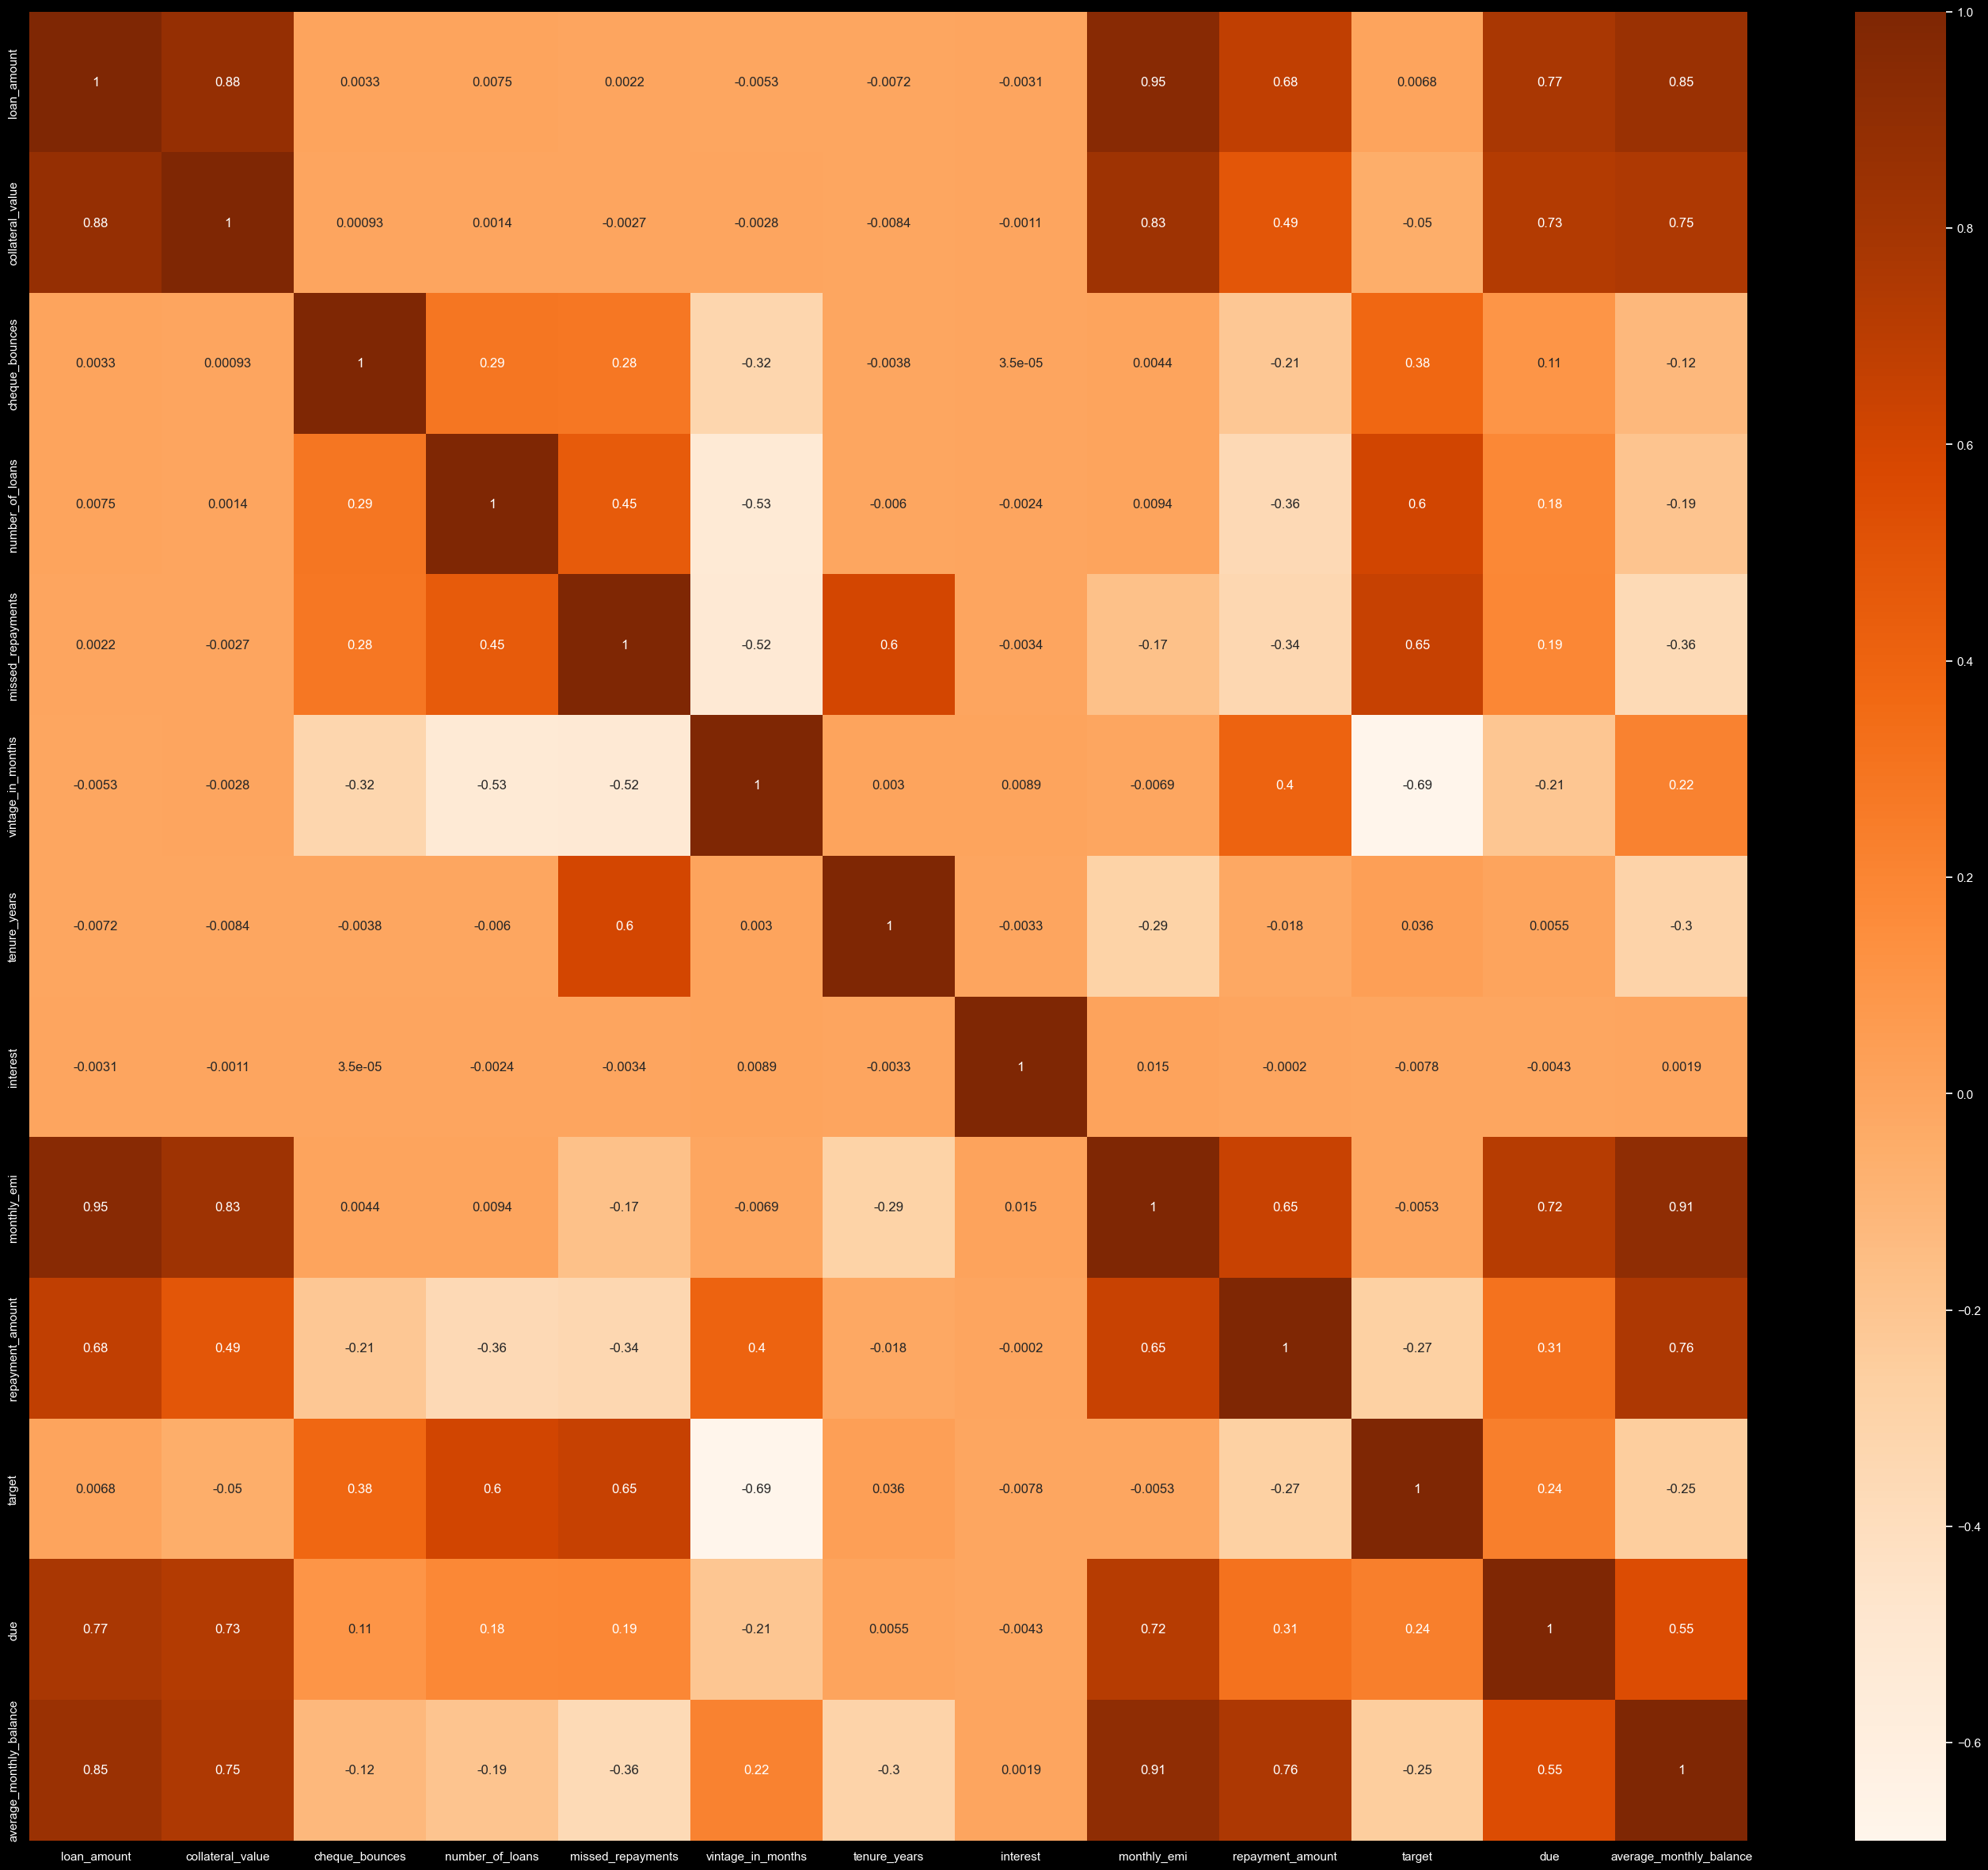

In [77]:
#Correlation Plot: Heatmap
import seaborn as sns
plt.figure(figsize = (35,30))

corr = data.corr()
sns.heatmap(corr, cmap="Oranges", annot=True)

In [78]:
categorical_data.columns

Index(['loan_acc_num', 'customer_name', 'customer_address', 'loan_type',
       'disbursal_date', 'default_date'],
      dtype='object')

In [79]:
curr_time= pd.to_datetime('now')

In [80]:
#Deriving new feature using date column
data['difference']= (curr_time-data['default_date'])/np.timedelta64(1, "D")

In [81]:
#Deriving new feature using date column
test_data['difference'] = (curr_time-test_data['default_date'])/np.timedelta64(1,'D')

In [82]:
# Dropping unnecessary coloumns for model building
data= data.drop(['disbursal_date', 'default_date', 'loan_acc_num', 'customer_name', 'customer_address'],1)

In [83]:
#Dropping unnecessary columns for model building
test_data = test_data.drop(['disbursal_date', 'default_date','loan_acc_num', 'customer_name', 'customer_address'],1)

In [84]:
# Encoding
encoded=pd.get_dummies(data['loan_type'], drop_first=True)

In [85]:
#Encoding
test_encoded = pd.get_dummies(test_data['loan_type'],drop_first=True)

In [86]:
data=data.drop(['loan_type'], axis=1)

In [87]:
test_data = test_data.drop(['loan_type'],axis=1)

In [88]:
data= pd.concat([data,encoded], axis=1)

In [89]:
test_data= pd.concat([test_data,test_encoded], axis=1)

In [90]:
#downloadng the prepared dataset for PyCaret
data.to_csv("pycaret_test.csv",index=False)

## Model Building

In [91]:
#train-test split
from sklearn.model_selection import train_test_split
X = data.drop(columns=['target'])
y = data [['target']]
# Choose any random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [92]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [93]:
unseen = sc.fit_transform(test_data)

In [94]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#### Using Recursive Feature Elimination

In [95]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE
rfe = RFE(lm, n_features_to_select=10)            
rfe = rfe.fit(X_train, y_train)

In [96]:
from sklearn.linear_model import *
from  sklearn import metrics
#Rsquared on test set
y_pred_lr = rfe.predict(X_test)
metrics.r2_score(y_test, y_pred_lr)

0.7756349800595066

#### Using Multiple Linear Regression

In [97]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

lm.fit(X_train, y_train)
#Rsquared on test set
y_pred_lr = lm.predict(X_test)
metrics.r2_score(y_test, y_pred_lr)

0.7811962854570624

#### Using Random Forest Regressor

In [98]:
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(bootstrap= True,n_estimators = 200, random_state = 42, max_depth=4,max_features=None,min_samples_leaf= 2,min_samples_split= 4)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features=None, min_samples_leaf=2,
                      min_samples_split=4, n_estimators=200, random_state=42)

In [99]:
y_pred_train = rf_regressor.predict(X_train)
print(r2_score(y_train, y_pred_train))

0.7245706459113583


In [100]:
y_pred_test = rf_regressor.predict(X_test)
print(r2_score(y_test, y_pred_test))

0.7273636647483164


#### Using Gradient Boosting Regressor

In [101]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

# Hyperparameters for GradientBoostingRegressor
gbr_params={'n_estimators' :500, "max_depth": 4,'min_samples_split': 4,'learning_rate': 0.01,'loss': 'squared_error'}

# Create an instance of gradient boosting regressor
gbr= GradientBoostingRegressor (**gbr_params)

## Fit the model
gbr.fit(X_train, y_train)
Y_pred= gbr.predict(X_test)
print('R squared : %.3f' %gbr.score (X_test, y_test))

R squared : 0.901


In [102]:
y_pred_train= gbr.predict(X_train)

# Print Coefficient of determination R^2
print('R_squared in train set:' , r2_score(y_train, y_pred_train))

R_squared in train set: 0.9040959918040924


In [103]:
y_pred_test= gbr.predict(X_test)
print('R_squared in test set:' , r2_score(y_test, y_pred_test))

R_squared in test set: 0.9009826242325177


[0.00000000e+00 8.27642038e-03 6.29420805e-03 9.57308377e-02
 2.29346406e-01 4.55337925e-01 5.66951780e-02 0.00000000e+00
 2.61179097e-03 1.05657884e-01 3.97555164e-02 2.93833105e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


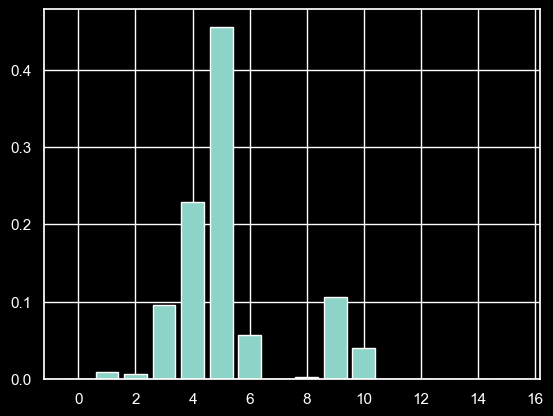

In [104]:
## Plot feature importance
#feature importance
print(gbr.feature_importances_)
plt.bar(range(len(gbr.feature_importances_)), gbr.feature_importances_)
plt.show()

<AxesSubplot:>

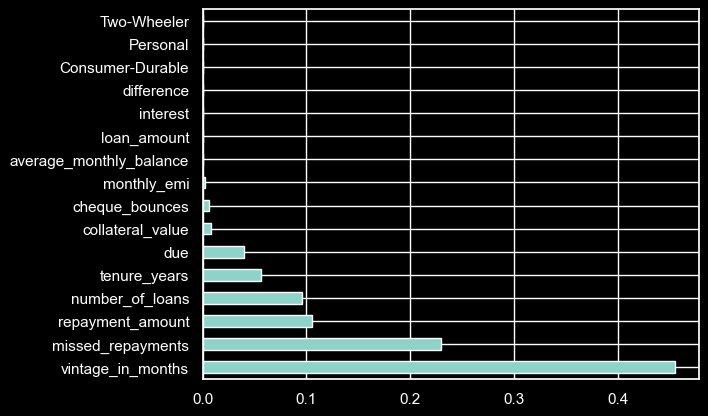

In [105]:
feat_importances= pd.Series(gbr.feature_importances_, index= X.columns)
feat_importances.nlargest(20).plot(kind='barh')

### Pycaret

In [106]:
%pip install pycaret

Note: you may need to restart the kernel to use updated packages.


In [107]:
dataset = pd.read_csv("pycaret_test.csv")
data_ = dataset.sample(frac=0.8, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data_.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data_.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (39911, 17)
Unseen Data For Predictions: (9978, 17)


In [108]:
#import pycaret
from pycaret.regression import *

In [109]:
exp_reg101 = setup(data = data_, target = 'target', session_id=123) 

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Regression
3,Original data shape,"(39911, 17)"
4,Transformed data shape,"(39911, 17)"
5,Transformed train set shape,"(27937, 17)"
6,Transformed test set shape,"(11974, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [110]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.0244,0.0012,0.0343,0.9760,0.0241,0.1199,0.2530
lightgbm,Light Gradient Boosting Machine,0.0322,0.0018,0.0422,0.9638,0.0303,0.1820,0.2740
rf,Random Forest Regressor,0.0463,0.0039,0.0625,0.9206,0.0454,0.2828,7.1600
gbr,Gradient Boosting Regressor,0.0501,0.0043,0.0657,0.9122,0.0473,0.3028,2.8680
et,Extra Trees Regressor,0.0527,0.0051,0.0715,0.8961,0.0523,0.3223,3.0680
dt,Decision Tree Regressor,0.0662,0.0084,0.0916,0.8294,0.0663,0.3338,0.1800
ada,AdaBoost Regressor,0.0839,0.0104,0.1020,0.7883,0.0734,0.5842,0.9770
lr,Linear Regression,0.0823,0.0108,0.1041,0.7796,0.0731,0.5367,1.2640
ridge,Ridge Regression,0.0823,0.0108,0.1041,0.7796,0.0731,0.5366,0.0310
br,Bayesian Ridge,0.0823,0.0108,0.1042,0.7795,0.0731,0.5358,0.0310


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=123, ...)

In [111]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [112]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [113]:
# define model
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('R_squared: %.3f (%.3f)' % (scores.mean(), scores.std()) )

R_squared: 0.977 (0.001)


In [114]:
# evaluate model
scores = cross_val_score(model, X_test, y_test, scoring='r2', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('R_squared: %.3f (%.3f)' % (scores.mean(), scores.std()) )

R_squared: 0.970 (0.002)


In [115]:
from xgboost import XGBRegressor
# define model
RegModel=XGBRegressor(max_depth=4, learning_rate=0.01, n_estimators=500, objective='reg:linear', booster='gbtree')

In [116]:
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=XGB.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

train score:  0.8997984846286474
test score:  0.8964291662716752


### Using Adaboost Regressor

In [117]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor(n_estimators=500,learning_rate=0.1)
Adaboost=ada_reg.fit(X_train,y_train)
prediction=Adaboost.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=Adaboost.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

train score:  0.7720725425236656
test score:  0.7769300756929037


#### Using ElasticNet : Hybrid Regularized Model

In [118]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [119]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [120]:
for a in alphas:
    model = ElasticNet(alpha=a).fit(X_train,y_train)   
    score = model.score(X_train,y_train)
    pred_y = model.predict(X_test)
    mse = mean_squared_error(y_test, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.78, MSE:0.01, RMSE:0.10
Alpha:0.0010, R2:0.77, MSE:0.01, RMSE:0.10
Alpha:0.0100, R2:0.75, MSE:0.01, RMSE:0.11
Alpha:0.1000, R2:0.55, MSE:0.02, RMSE:0.15
Alpha:0.3000, R2:0.01, MSE:0.05, RMSE:0.22
Alpha:0.5000, R2:0.00, MSE:0.05, RMSE:0.22
Alpha:0.7000, R2:0.00, MSE:0.05, RMSE:0.22
Alpha:1.0000, R2:0.00, MSE:0.05, RMSE:0.22


In [121]:
elastic=ElasticNet(alpha=0.001).fit(X_train, y_train)
y_pred = elastic.predict(X_test)
score = elastic.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.780, MSE:0.01, RMSE:0.10


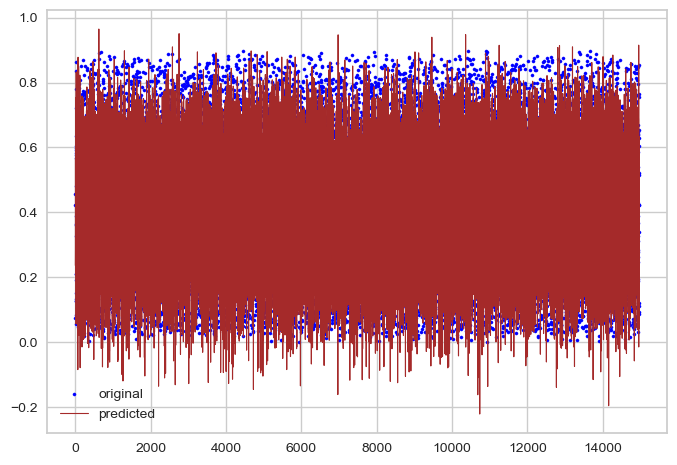

In [122]:
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="brown", label="predicted")
plt.legend()
plt.show()

In [123]:
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(X_train, y_train)
print("Alpha: ",model.alpha_)
print("Intercept: ",model.intercept_)

Alpha:  0.0001
Intercept:  0.4241654676370259


In [124]:
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.781, MSE:0.01, RMSE:0.10


#### Using LightGBM

In [125]:
plt.style.use('ggplot')
import lightgbm as ltb

In [126]:
model = ltb.LGBMRegressor()
model.fit(X_train, y_train)
print(); print(model)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2134
[LightGBM] [Info] Number of data points in the train set: 34922, number of used features: 16
[LightGBM] [Info] Start training from score 0.424165

LGBMRegressor()


In [127]:
y_pred = model.predict(X_test)
print("Rsqaured on test data: ",metrics.r2_score(y_test, y_pred))

Rsqaured on test data:  0.965125001305115


### Model Evaluation: Hyperparameter Tuning

In [128]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
# define the model with best resulted parameters
RegModel=XGBRegressor(colsample_bytree= 0.7, max_depth=3, learning_rate=0.5, n_estimators=1000, objective='reg:linear', booster='gbtree')
xgbr = xgb.XGBRegressor(seed = 20)
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=XGB.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

train score:  0.9959192885034708
test score:  0.9897083070417368


In [129]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
# define the model with best resulted parameters
RegModel=XGBRegressor(colsample_bytree= 0.7, max_depth=3, learning_rate=0.5, n_estimators=1000, objective='reg:linear', booster='gbtree')
xgbr = xgb.XGBRegressor(seed = 20)
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_train)
print("train score: ", r2_score(y_train, prediction))
y_pred_test=XGB.predict(X_test)
print("test score: ", r2_score(y_test, y_pred_test))

train score:  0.9959192885034708
test score:  0.9897083070417368


We can finalize fine tuned XGBoost as well as it is giving us 99.5% Rsqaured on test data

### Prediction on Unseen Data

In [130]:
data.columns

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'target', 'due',
       'average_monthly_balance', 'difference', 'Consumer-Durable', 'Personal',
       'Two-Wheeler'],
      dtype='object')

In [131]:
test_data.columns

Index(['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'due', 'average_monthly_balance',
       'difference', 'Consumer-Durable', 'Personal', 'Two-Wheeler'],
      dtype='object')

In [132]:
test_data = sc.fit_transform(test_data)

In [133]:
test_data = pd.DataFrame(test_data)

In [134]:
test_data.columns = ['loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'repayment_amount', 'due',
       'average_monthly_balance', 'difference', 'Consumer-Durable', 'Personal',
       'Two-Wheeler']

In [135]:
#Making predictions
final_predictions = XGB.predict(test_data)
final_prediction_series = pd.Series(final_predictions)

In [136]:
#Combining the results into dataframe
submission_df = pd.DataFrame({'id':test['loan_acc_num'].values, 'LGD':final_prediction_series.values})

In [137]:
submission_df.sample(10)

,id,LGD
9567,LN79314476,0.292975
509,LN29607396,0.090451
2666,LN58336031,0.593757
7933,LN63861516,0.782182
2173,LN75928651,0.419479
2351,LN39906930,0.453849
5509,LN71190131,0.042157
5200,LN15592368,0.001047
5891,LN64075392,0.652004
1316,LN84250178,0.510246


In [138]:
submission_df.to_csv("submission.csv",index=False)

**<font color=purple>PREPARED BY: </font>**
<br>
<font color=black> Vandit Sardana </font>